<a href="https://colab.research.google.com/github/zhulkhoirrifat/nuka-pos/blob/main/seeding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library & Setup

In [ ]:
!pip install faker bcrypt

In [ ]:
from faker import Faker
import random
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pandas as pd
import numpy as np
import os
import json
import bcrypt

In [ ]:
fake = Faker('id_ID')

## Generate Function

### Users

In [ ]:
role_distribution = {
    "Owner": 10,
    "Admin Toko": 50,
    "Kasir": 100,
    "Superadmin": 10
}

role_id_mapping = {
    "Owner": 2,
    "Admin Toko": 3,
    "Kasir": 4,
    "Superadmin": 1
}

In [ ]:
def fake_phone_number(fake: Faker) -> str:
    provider_prefixes = {
        'Telkomsel': ['0811', '0812', '0813', '0821', '0822', '0823', '0852', '0853', '0851'],
        'XL': ['0817', '0818', '0819', '0859', '0877', '0878'],
        'Indosat': ['0814', '0815', '0816', '0855', '0856', '0857', '0858'],
        'Tri': ['0895', '0896', '0897', '0898', '0899'],
        'Smartfren': ['0881', '0882', '0883', '0884', '0885', '0886', '0887', '0888', '0889']
    }

    provider = random.choice(list(provider_prefixes.keys()))
    prefix = random.choice(provider_prefixes[provider])

    random_digits = fake.numerify(text='#######')

    return f'62{prefix[1:]}{random_digits}'

In [ ]:
def generate_users(role_distribution, role_id_mapping):
    """ Membuat data dummy users
    Args:
        role_distribuiton(dict): Jumlah distribusi role pada user.
        role_id_mapping(dict): Id role pada tabel roles
    Return:
        users_data(list): Hasil generate data dummy users

    """
    users_data = []
    user_id = 1

    for role, jumlah in role_distribution.items():
        for _ in range(jumlah):

            name_male = fake.first_name_male() + " " + fake.last_name_male()
            name_female = fake.first_name_female() + " " + fake.last_name_female()

            email = fake.email()
            phone_number = fake_phone_number(fake)
            plain_password = fake.password()
            password = bcrypt.hashpw(plain_password.encode('utf-8'), bcrypt.gensalt(10)).decode('utf-8')
            gender = random.choice(['MALE', 'FEMALE'])
            name = name_male if gender == 'MALE' else name_female
            image_url = fake.image_url()
            id_card = fake.image_url()
            npwp = fake.image_url()
            role_id = role_id_mapping[role]

            users_data.append({
                'userId': user_id,
                'name': name,
                'email': email,
                'password': password,
                'imageUrl': image_url,
                'phoneNumber': phone_number,
                'isEmailVerified': 1,
                'roleId': role_id
            })
            user_id += 1
    return users_data

In [ ]:
users_data = generate_users(role_distribution, role_id_mapping)
users_df = pd.DataFrame(users_data)
users_df.to_csv('users.csv', index=False)

In [ ]:
users_df

,userId,name,email,password,imageUrl,phoneNumber,isEmailVerified,roleId
0,1,Maman Hutapea,qkusumo@example.com,$2b$10$KESE40mAQtsvuuDCL3yRP.yhviEddd/rRaMQq5g...,https://picsum.photos/4/489,628967018193,1,2
1,2,Gawati Safitri,juli04@example.org,$2b$10$eKJ6Q9iZBmRGFE7hCKlhqO7IjGPuGqieheRbfz4...,https://placekitten.com/489/707,628183108117,1,2
2,3,Fitria Oktaviani,balijan67@example.org,$2b$10$A1Jj5Iwe2oT.z5MToND07.yC3vdXUSi6Y807NNx...,https://placekitten.com/685/532,628192249367,1,2
3,4,Vino Gunawan,purnawatidiana@example.com,$2b$10$H6skFx5ftQpzGCRQvbp7kuq5ZFBxKCoqmxq3k4H...,https://placekitten.com/589/228,628181396598,1,2
4,5,Martana Pangestu,damanikaisyah@example.net,$2b$10$Mis.elxwl0/zNtgCr7ZGx.PzFws9oTCi0sU/c0O...,https://dummyimage.com/251x603,628171451348,1,2
...,...,...,...,...,...,...,...,...
165,166,Darman Prasetya,rahayumelinda@example.net,$2b$10$/TTznn1ml9.58.gjWmgVKOvkrqrAKndiJYOZ5pE...,https://dummyimage.com/8x282,628958221297,1,1
166,167,Tami Yolanda,dsantoso@example.net,$2b$10$UGSv6CLXwRkKDhIXL.bAqewuhhfkZF3z3NRqx9F...,https://placekitten.com/840/112,628152616364,1,1
167,168,Gilang Manullang,bakidinsimbolon@example.net,$2b$10$raPwt0n5oYA9xfwUzfrHUeERwNwVbF8fpMzstb8...,https://placekitten.com/282/628,628859277927,1,1
168,169,Sadina Nurdiyanti,hutasoitjessica@example.net,$2b$10$G/2ECAN14CswbiB5pQ0JqetXT8jmeG8mdgsQcoA...,https://picsum.photos/568/839,628198048309,1,1


### Tenants

In [ ]:
province_id = 32
city_id = 71

districts = {
    "5579": "BALIKPAPAN SELATAN",
    "5753": "BALIKPAPAN KOTA",
    "5783": "BALIKPAPAN TIMUR",
    "5693": "BALIKPAPAN UTARA",
    "5507": "BALIKPAPAN TENGAH",
    "5689": "BALIKPAPAN BARAT"
}

villages = {
    "5579": [
        {"id": "60411", "name": "GUNUNG BAHAGIA"},
        {"id": "62966", "name": "SEPINGGAN"},
        {"id": "60197", "name": "DAMAI BARU"},
        {"id": "60196", "name": "DAMAI BAHAGIA"},
        {"id": "59139", "name": "SUNGAI NANGKA"},
        {"id": "62968", "name": "SEPINGGAN RAYA"},
        {"id": "62967", "name": "SEPINGGAN BARU"}
    ],
    "5753": [
        {"id": "62384", "name": "PRAPATAN"},
        {"id": "63153", "name": "TELAGA SARI"},
        {"id": "60900", "name": "KLANDASAN ULU"},
        {"id": "60899", "name": "KLANDASAN ILIR"},
        {"id": "60195", "name": "DAMAI"}
    ],
    "5783": [
        {"id": "61365", "name": "MANGGAR"},
        {"id": "61366", "name": "MANGGAR BARU"},
        {"id": "61019", "name": "LEMARU"},
        {"id": "63284", "name": "TERITIP"}
    ],
    "5693": [
        {"id": "61718", "name": "MUARA RAPAK"},
        {"id": "60412", "name": "GUNUNG SAMARINDA"},
        {"id": "59798", "name": "BATU AMPAR"},
        {"id": "60710", "name": "KARANG JOANG"},
        {"id": "60413", "name": "GUNUNG SAMARINDA BARU"},
        {"id": "60379", "name": "GRAHA INDAH"}
    ],
    "5507": [
        {"id": "60414", "name": "GUNUNG SARI ILIR"},
        {"id": "60415", "name": "GUNUNG SARI ULU"},
        {"id": "61482", "name": "MEKAR SARI"},
        {"id": "60714", "name": "KARANG REJO"},
        {"id": "58912", "name": "SUMBER REJO"},
        {"id": "60708", "name": "KARANG JATI"}
    ],
    "5689": [
        {"id": "59771", "name": "BARU TENGAH"},
        {"id": "61407", "name": "MARGA SARI"},
        {"id": "59769", "name": "BARU ILIR"},
        {"id": "61411", "name": "MARGO MULYO"},
        {"id": "59772", "name": "BARU ULU"},
        {"id": "60731", "name": "KARIANGAU"}
    ]
}

In [ ]:
def generate_tenants(users_data):
    """ Membuat data dummy tenants.
    Args:
        users_data(list): Data users yang telah digenerate.

    Return:
        tenants_data(list): Hasil generate data dummy tenants.
    """
    tenants_data = []
    tenant_id = 1
    global province_id, city_id

    for i, user in enumerate(users_data):
        if user['roleId'] == 2:
            user_id = user['userId']
            name = fake.company()
            npwp_company_number = random.randint(100000000000000, 999999999999999)
            npwp_company_image= fake.image_url()
            province_id = province_id
            city_id = city_id
            district_id = random.choice(list(districts.keys()))
            village = random.choice(villages[district_id])
            village_id = village['id']

            tenants_data.append({
                'tenantId': tenant_id,
                'userId': user_id,
                'name': name,
                'npwpCompanyNumber': npwp_company_number,
                'npwpCompanyImage': npwp_company_image,
                'provinceId': province_id,
                'cityId': city_id,
                'districtId': district_id,
                'villageId': village_id,
            })
            tenant_id += 1

    return tenants_data

In [ ]:
tenants_data = generate_tenants(users_data)
tenants_df = pd.DataFrame(tenants_data)
tenants_df.to_csv('tenants.csv', index=False)

In [ ]:
tenants_df

,tenantId,userId,name,npwpCompanyNumber,npwpCompanyImage,provinceId,cityId,districtId,villageId
0,1,1,PD Hakim Januar,779896776654793,https://picsum.photos/663/192,32,71,5507,60714
1,2,2,UD Wacana Damanik (Persero) Tbk,227216852864445,https://placekitten.com/654/807,32,71,5507,61482
2,3,3,UD Situmorang Tbk,633358602958973,https://dummyimage.com/502x926,32,71,5693,60412
3,4,4,PD Nasyiah Usada (Persero) Tbk,324968242109371,https://placekitten.com/570/216,32,71,5783,61366
4,5,5,PT Megantara Fujiati,966932663036040,https://picsum.photos/937/344,32,71,5693,60710
5,6,6,UD Yuniar Wahyudin,868849680883427,https://picsum.photos/144/412,32,71,5753,60899
6,7,7,PD Mahendra Winarsih,466170115691625,https://picsum.photos/523/522,32,71,5507,61482
7,8,8,CV Tampubolon Hakim,836417089822446,https://placekitten.com/330/714,32,71,5579,60196
8,9,9,UD Simanjuntak Tbk,365952528146389,https://placekitten.com/417/476,32,71,5783,61019
9,10,10,CV Siregar Anggriawan Tbk,816488348230225,https://dummyimage.com/767x355,32,71,5753,62384


### Stores

In [ ]:
store_types_dict = {
    1: 'Makanan & Minuman',
    2: 'Fashion & Aksesoris',
    3: 'Perawatan Diri & Kecantikan',
    4: 'Elektronik, Gadget & Alat Musik',
    5: 'Perlengkapan Rumah Tangga & Dekorasi',
    6: 'Otomotif & Suku Cadang',
    7: 'Pertanian, Peternakan & Toko Hewan',
    8: 'Mainan, Hobi & Peralatan Outdoor',
    9: 'Peralatan Bayi & Anak',
    10: 'Minimarket & Kelontong',
    11: 'Produk Kesehatan',
    12: 'Pulsa & Layanan'
}

store_types_list = [{'storeTypeId': k, 'name': v} for k, v in store_types_dict.items()]

In [ ]:
def generate_stores(tenants_data, store_types_dict, total_stores=30):
    """ Membuat data dummy stores dengan distribusi acak.
    Args:
        tenants_data (list): Data tenant yang telah digenerate.
        store_types_dict (dict): Dictionary tipe dari toko yang akan di-generate.
        total_stores (int): Total toko yang akan digenerate.

    Return:
        stores_data (list): Hasil generate data dummy stores.
    """
    stores_data = []
    store_id = 1
    store_names = {}
    owner_ids = [tenant["userId"] for tenant in tenants_data]

    def generate_unique_store_name(base_name):
        if base_name not in store_names:
            store_names[base_name] = 1
            return base_name
        else:
            store_names[base_name] += 1
            return f'{base_name} Cabang {store_names[base_name]}'

    # Tentukan jumlah toko yang dimiliki setiap tenant secara acak
    store_distribution = {owner_id: random.randint(1, 5) for owner_id in owner_ids}  # Bisa memiliki 1 hingga 5 toko

    for owner_id, num_stores in store_distribution.items():
        for _ in range(num_stores):
            if len(stores_data) >= total_stores:
                break  # Berhenti jika jumlah toko sudah cukup

            store_type_id, store_type_name = random.choice(list(store_types_dict.items()))
            district_id = random.choice(list(districts.keys()))
            village = random.choice(villages[district_id])
            village_id = village['id']
            owner_name = next(user['name'] for user in users_data if user['userId'] == owner_id)
            base_name = f"{store_type_name} {owner_name.split()[1]}"
            name = generate_unique_store_name(base_name)

            stores_data.append({
                "storeId": store_id,
                "StoreCode": f'STR-{random.randint(10000000,99999999)}',
                "tenantId": owner_id,
                "name": name,
                "image": fake.image_url(),
                "address": fake.address(),
                "provinceId": province_id,
                "cityId": city_id,
                "districtId": district_id,
                "villageId": village_id,
                "storeTypeId": store_type_id,
                "postalCode": fake.postcode(),
                "description": fake.text(),
                "phoneNumber": fake_phone_number(fake),
                "logo": fake.image_url(),
                "npwpCompany": fake.image_url(),
                "permitCertificate": fake.image_url(),
                "status": 'ACTIVE'
            })
            store_id += 1

    return stores_data

In [ ]:
stores_data = generate_stores(tenants_data, store_types_dict)
stores_df = pd.DataFrame(stores_data)
stores_df.to_csv('stores.csv', index=False)

In [ ]:
stores_df

,storeId,StoreCode,tenantId,name,image,address,provinceId,cityId,districtId,villageId,storeTypeId,postalCode,description,phoneNumber,logo,npwpCompany,permitCertificate,status
0,1,STR-74705339,1,Pulsa & Layanan Hutapea,https://placekitten.com/407/717,"Gg. Rajiman No. 42\nPekanbaru, Nusa Tenggara T...",32,71,5579,62967,12,91469,Quaerat ad pariatur maiores eum numquam provid...,628787581340,https://dummyimage.com/90x142,https://placekitten.com/418/668,https://placekitten.com/300/623,ACTIVE
1,2,STR-95836701,2,"Elektronik, Gadget & Alat Musik Safitri",https://picsum.photos/471/488,"Gang H.J Maemunah No. 0\nBogor, Kepulauan Bang...",32,71,5753,60900,4,69727,Dignissimos reprehenderit nesciunt facilis cor...,628884284133,https://placekitten.com/573/221,https://dummyimage.com/796x585,https://placekitten.com/848/121,ACTIVE
2,3,STR-44593474,2,"Elektronik, Gadget & Alat Musik Safitri Cabang 2",https://placekitten.com/936/248,"Jl. Soekarno Hatta No. 64\nBanjar, Kepulauan B...",32,71,5693,60379,4,57122,Totam ad blanditiis provident explicabo maxime...,628825264260,https://placekitten.com/712/350,https://dummyimage.com/993x702,https://placekitten.com/699/228,ACTIVE
3,4,STR-89242681,2,"Pertanian, Peternakan & Toko Hewan Safitri",https://dummyimage.com/902x448,"Gg. Kapten Muslihat No. 42\nParepare, MA 29508",32,71,5753,60899,7,77094,Porro non ex voluptas quam. Odit optio eos nih...,628561535689,https://placekitten.com/297/613,https://dummyimage.com/438x362,https://placekitten.com/867/920,ACTIVE
4,5,STR-53208721,2,Produk Kesehatan Safitri,https://placekitten.com/254/318,"Jalan Asia Afrika No. 5\nBandung, Kepulauan Ba...",32,71,5507,60414,11,16530,Iure quia suscipit eos. Dignissimos reprehende...,628571946388,https://picsum.photos/142/708,https://dummyimage.com/225x48,https://dummyimage.com/845x139,ACTIVE
5,6,STR-59637113,3,Minimarket & Kelontong Oktaviani,https://picsum.photos/1004/677,"Gang Merdeka No. 13\nSorong, BB 18127",32,71,5753,63153,10,53843,Vel maiores sequi unde modi. Alias exercitatio...,628177353047,https://picsum.photos/332/842,https://placekitten.com/292/658,https://placekitten.com/474/907,ACTIVE
6,7,STR-36231970,3,Makanan & Minuman Oktaviani,https://dummyimage.com/95x189,"Jalan Peta No. 3\nPangkalpinang, KI 40382",32,71,5783,61019,1,88574,Nisi velit incidunt. Ea iusto consequuntur inv...,628566303643,https://picsum.photos/871/107,https://picsum.photos/459/207,https://dummyimage.com/700x141,ACTIVE
7,8,STR-33279133,3,Produk Kesehatan Oktaviani,https://picsum.photos/567/260,"Gang Cikutra Timur No. 7\nAmbon, SU 60798",32,71,5579,60411,11,98414,Reiciendis et similique sed quisquam voluptate...,628876016057,https://picsum.photos/444/974,https://dummyimage.com/153x573,https://placekitten.com/668/933,ACTIVE
8,9,STR-15379137,3,Peralatan Bayi & Anak Oktaviani,https://placekitten.com/666/186,"Jalan Ciumbuleuit No. 663\nPayakumbuh, NT 69973",32,71,5579,60196,9,74435,Quisquam neque perspiciatis placeat expedita a...,628788022111,https://dummyimage.com/384x406,https://dummyimage.com/651x138,https://picsum.photos/145/276,ACTIVE
9,10,STR-53755839,4,Makanan & Minuman Gunawan,https://placekitten.com/700/307,"Jalan Suryakencana No. 589\nBlitar, Jambi 24915",32,71,5579,62966,1,54923,Aut sapiente facere excepturi. Exercitationem ...,628598848800,https://dummyimage.com/179x284,https://placekitten.com/107/938,https://dummyimage.com/502x962,ACTIVE


In [ ]:
check_pemilik = stores_df['tenantId'].value_counts()
print(check_pemilik)

tenantId
2     4
3     4
10    4
8     4
9     3
4     3
5     3
6     2
7     2
1     1
Name: count, dtype: int64


In [ ]:
jumlah_toko = stores_df[stores_df['tenantId'] == 3]

jumlah_toko

,storeId,StoreCode,tenantId,name,image,address,provinceId,cityId,districtId,villageId,storeTypeId,postalCode,description,phoneNumber,logo,npwpCompany,permitCertificate,status
5,6,STR-59637113,3,Minimarket & Kelontong Oktaviani,https://picsum.photos/1004/677,"Gang Merdeka No. 13\nSorong, BB 18127",32,71,5753,63153,10,53843,Vel maiores sequi unde modi. Alias exercitatio...,628177353047,https://picsum.photos/332/842,https://placekitten.com/292/658,https://placekitten.com/474/907,ACTIVE
6,7,STR-36231970,3,Makanan & Minuman Oktaviani,https://dummyimage.com/95x189,"Jalan Peta No. 3\nPangkalpinang, KI 40382",32,71,5783,61019,1,88574,Nisi velit incidunt. Ea iusto consequuntur inv...,628566303643,https://picsum.photos/871/107,https://picsum.photos/459/207,https://dummyimage.com/700x141,ACTIVE
7,8,STR-33279133,3,Produk Kesehatan Oktaviani,https://picsum.photos/567/260,"Gang Cikutra Timur No. 7\nAmbon, SU 60798",32,71,5579,60411,11,98414,Reiciendis et similique sed quisquam voluptate...,628876016057,https://picsum.photos/444/974,https://dummyimage.com/153x573,https://placekitten.com/668/933,ACTIVE
8,9,STR-15379137,3,Peralatan Bayi & Anak Oktaviani,https://placekitten.com/666/186,"Jalan Ciumbuleuit No. 663\nPayakumbuh, NT 69973",32,71,5579,60196,9,74435,Quisquam neque perspiciatis placeat expedita a...,628788022111,https://dummyimage.com/384x406,https://dummyimage.com/651x138,https://picsum.photos/145/276,ACTIVE


In [ ]:
check_store = stores_df[stores_df['storeId'] == 21]
check_store

,storeId,StoreCode,tenantId,name,image,address,provinceId,cityId,districtId,villageId,storeTypeId,postalCode,description,phoneNumber,logo,npwpCompany,permitCertificate,status
20,21,STR-41268947,8,Otomotif & Suku Cadang Agustina,https://placekitten.com/408/845,"Gg. Rajiman No. 7\nPekanbaru, JT 08857",32,71,5579,59139,6,94232,Harum suscipit inventore eligendi repudiandae....,628954749144,https://dummyimage.com/417x855,https://picsum.photos/49/296,https://dummyimage.com/340x307,ACTIVE


### Store Users

In [ ]:
def generate_store_users(users_data, stores_data):
    """ Membuat data dummy store_users.
    Args:
        users_data(list): Data users yang telah digenerate.
        stores_data(list): Data stores yang telah digenerate.

    Return:
        store_users_data(list): Hasil generate data dummy store_users.
    """

    store_users_data = []
    store_user_id = 1

    for user in users_data:
        if user['roleId'] in [3, 4]:
            store_id = random.choice(stores_data)['storeId']
            store_users_data.append({
                'storeUserId': store_user_id,
                'userId': user['userId'],
                'storeId': store_id
            })
            store_user_id += 1

        elif user["roleId"] == 2:
            for store in stores_data:
                if store["tenantId"] == user["userId"]:
                    store_users_data.append({
                        "storeUserId": store_user_id,
                        "userId": user["userId"],
                        "storeId": store["storeId"]
                    })
                    store_user_id += 1
    return store_users_data

In [ ]:
store_users_data = generate_store_users(users_data, stores_data)
store_users_df = pd.DataFrame(store_users_data)
store_users_df.to_csv('store_users.csv', index=False)

In [ ]:
store_users_df

,storeUserId,userId,storeId
0,1,1,1
1,2,2,2
2,3,2,3
3,4,2,4
4,5,2,5
...,...,...,...
175,176,156,20
176,177,157,25
177,178,158,17
178,179,159,19


In [ ]:
store_users_df['storeId'].value_counts()

,count
storeId,
5,10
19,10
18,9
25,9
1,9
2,8
26,8
12,7
11,7


In [ ]:
check_toko = store_users_df[store_users_df['userId'] == 73]
check_toko

,storeUserId,userId,storeId
92,93,73,29


In [ ]:
check_toko = store_users_df[store_users_df['storeId'] == 21]
check_toko

,storeUserId,userId,storeId
20,21,8,21
77,78,58,21
88,89,69,21
96,97,77,21
118,119,99,21
156,157,137,21


In [ ]:
check_karyawan = users_df[users_df['userId'] == 73]
check_karyawan

,userId,name,email,password,imageUrl,phoneNumber,isEmailVerified,roleId
72,73,Vivi Haryanti,wahyunisalsabila@example.org,$2b$10$y5gYXBVk/UjkAPmRfzDqIe5rHRy5VOza9iawg7Q...,https://dummyimage.com/601x962,628987062909,1,4


### Shifts

In [ ]:
# Hari dalam seminggu
shift_days = ['SUNDAY', 'MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY']

# Rentang waktu 6 bulan
start_date = datetime(2024, 1, 1)
end_date = datetime(2025, 3, 10)

In [ ]:
def get_week_starts(start, end):
    week_starts = []
    current = start
    while current < end:
        week_starts.append(current)
        current += timedelta(days=7)
    return week_starts

In [ ]:
def get_store_operation_hours(store_type_id):
    # Minimarket dan Produk Kesehatan bisa 8, 12, atau 24 jam
    if store_type_id in [10, 11]:  # Minimarket & Produk Kesehatan
        # Distribusi: 60% 12 jam, 30% 8 jam, 10% 24 jam
        rand = random.random()
        if rand < 0.6:
            return 12  # Mayoritas 12 jam
        elif rand < 0.9:
            return 8   # 30% 8 jam
        else:
            return 24  # 10% 24 jam
    else:
        # Toko lain hanya 8 atau 12 jam (70% 8 jam, 30% 12 jam)
        return 8 if random.random() < 0.7 else 12

In [ ]:
# Definisikan shift berdasarkan jam operasional toko
def get_shift_times(operation_hours):
    if operation_hours == 24:
        return [(7, 15), (15, 23), (23, 7)]  # 3 shift untuk 24 jam
    elif operation_hours == 12:
        return [(8, 16), (14, 22)]  # 2 shift untuk 12 jam
    else:  # 8 jam
        return [(9, 17)]  # 1 shift untuk 8 jam

In [ ]:
def generate_shifts(store_users_data, users_data, stores_data):
    shift_data = []
    shift_id = 1
    week_starts = get_week_starts(start_date, end_date)

    user_role_map = {user["userId"]: user["roleId"] for user in users_data}
    store_type_map = {store["storeId"]: store["storeTypeId"] for store in stores_data}
    store_operation_hours = {store["storeId"]: get_store_operation_hours(store["storeTypeId"]) for store in stores_data}

    for store_user in store_users_data:
        user_id = store_user["userId"]
        role_id = user_role_map.get(user_id)
        if role_id != 4:  # Hanya kasir
            continue

        store_id = store_user["storeId"]
        operation_hours = store_operation_hours[store_id]
        shift_times = get_shift_times(operation_hours)
        user_store_id = store_user["storeUserId"]

        # Pastikan setiap hari memiliki shift
        for shift_date in pd.date_range(start=start_date, end=end_date, freq='D'):
            work_day = shift_days[shift_date.weekday()]
            for start_hour, end_hour in shift_times:
                shift_start = datetime.combine(shift_date, datetime.min.time()) + timedelta(hours=start_hour)
                shift_end = shift_start + timedelta(hours=(end_hour - start_hour))
                if end_hour < start_hour:
                    shift_end += timedelta(days=1)

                shift_data.append({
                    "shiftId": shift_id,
                    "shiftStart": shift_start,
                    "shiftEnd": shift_end,
                    "day": work_day,
                    "storeUserId": user_store_id
                })
                shift_id += 1

    return shift_data

In [ ]:
shifts_data = generate_shifts(store_users_data, users_data, stores_data)
shifts_df = pd.DataFrame(shifts_data)
shifts_df.to_csv('shifts.csv', index=False)

In [ ]:
shifts_df

,shiftId,shiftStart,shiftEnd,day,storeUserId
0,1,2024-01-01 08:00:00,2024-01-01 16:00:00,SUNDAY,81
1,2,2024-01-01 14:00:00,2024-01-01 22:00:00,SUNDAY,81
2,3,2024-01-02 08:00:00,2024-01-02 16:00:00,MONDAY,81
3,4,2024-01-02 14:00:00,2024-01-02 22:00:00,MONDAY,81
4,5,2024-01-03 08:00:00,2024-01-03 16:00:00,TUESDAY,81
...,...,...,...,...,...
63505,63506,2025-03-08 14:00:00,2025-03-08 22:00:00,FRIDAY,180
63506,63507,2025-03-09 08:00:00,2025-03-09 16:00:00,SATURDAY,180
63507,63508,2025-03-09 14:00:00,2025-03-09 22:00:00,SATURDAY,180
63508,63509,2025-03-10 08:00:00,2025-03-10 16:00:00,SUNDAY,180


In [ ]:
shifts_df[shifts_df['storeUserId'] == 93].value_counts().sum()

np.int64(435)

In [ ]:
shifts_df[shifts_df['storeUserId'] == 93]

,shiftId,shiftStart,shiftEnd,day,storeUserId
7395,7396,2024-01-01 09:00:00,2024-01-01 17:00:00,SUNDAY,93
7396,7397,2024-01-02 09:00:00,2024-01-02 17:00:00,MONDAY,93
7397,7398,2024-01-03 09:00:00,2024-01-03 17:00:00,TUESDAY,93
7398,7399,2024-01-04 09:00:00,2024-01-04 17:00:00,WEDNESDAY,93
7399,7400,2024-01-05 09:00:00,2024-01-05 17:00:00,THURSDAY,93
...,...,...,...,...,...
7825,7826,2025-03-06 09:00:00,2025-03-06 17:00:00,WEDNESDAY,93
7826,7827,2025-03-07 09:00:00,2025-03-07 17:00:00,THURSDAY,93
7827,7828,2025-03-08 09:00:00,2025-03-08 17:00:00,FRIDAY,93
7828,7829,2025-03-09 09:00:00,2025-03-09 17:00:00,SATURDAY,93


In [ ]:
shifts_df.value_counts(shifts_df['storeUserId'])

,count
storeUserId,
122,1305
136,1305
117,1305
81,870
116,870
...,...
167,435
176,435
173,435


In [ ]:
check_karyawan = shifts_df[shifts_df['storeUserId'] == 93]
check_karyawan

,shiftId,shiftStart,shiftEnd,day,storeUserId
7395,7396,2024-01-01 09:00:00,2024-01-01 17:00:00,SUNDAY,93
7396,7397,2024-01-02 09:00:00,2024-01-02 17:00:00,MONDAY,93
7397,7398,2024-01-03 09:00:00,2024-01-03 17:00:00,TUESDAY,93
7398,7399,2024-01-04 09:00:00,2024-01-04 17:00:00,WEDNESDAY,93
7399,7400,2024-01-05 09:00:00,2024-01-05 17:00:00,THURSDAY,93
...,...,...,...,...,...
7825,7826,2025-03-06 09:00:00,2025-03-06 17:00:00,WEDNESDAY,93
7826,7827,2025-03-07 09:00:00,2025-03-07 17:00:00,THURSDAY,93
7827,7828,2025-03-08 09:00:00,2025-03-08 17:00:00,FRIDAY,93
7828,7829,2025-03-09 09:00:00,2025-03-09 17:00:00,SATURDAY,93


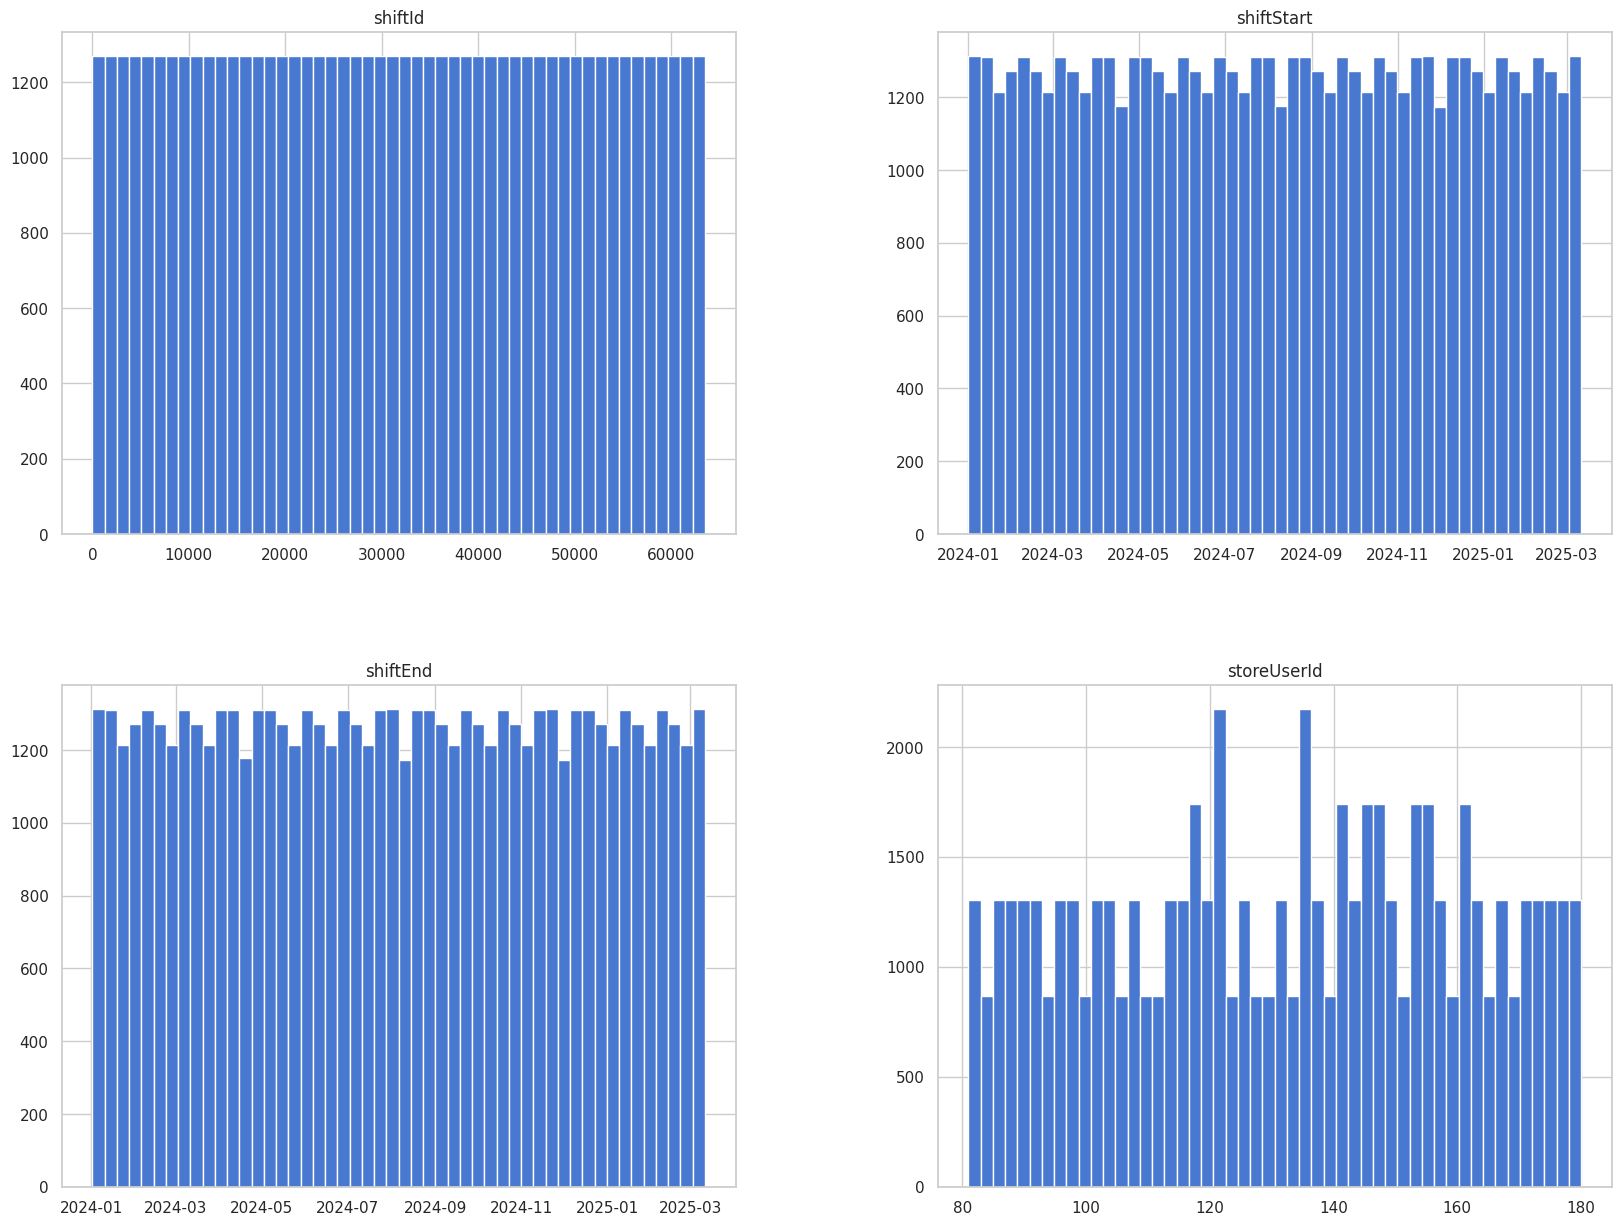

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

shifts_df.hist(bins=50, figsize=(20,15))
plt.show()

### Customers

In [ ]:
def generate_customers(users_data, stores_data, store_users_data, total_customers=7000):
    customers_data = []
    customer_id = 1

    cashiers = {user["userId"] for user in users_data if user.get("roleId") == 4}

    store_users_mapping = {}
    for su in store_users_data:
        if su["userId"] in cashiers:
            store_users_mapping.setdefault(su["storeId"], []).append(su)

    for _ in range(total_customers):
        store = random.choice(stores_data)
        store_id = store['storeId']

        if store_id in store_users_mapping:
            store_user = random.choice(store_users_mapping[store_id])
            user_id = store_user['userId']
        else:
            continue

        name = fake.name()
        phone = fake_phone_number(fake)
        choices = ['ACTIVE', 'INACTIVE']
        weights = [0.9, 0.1]
        status = random.choices(choices, weights=weights, k=1)[0]

        customers_data.append({
            "customerId": customer_id,
            "storeId": store_id,
            "userId": user_id,
            "name": fake.first_name() + " " + fake.last_name(),
            "phoneNumber": phone,
            "status": status
        })
        customer_id += 1

    return customers_data


In [ ]:
customers_data = generate_customers(users_data, stores_data, store_users_data)
customers_df = pd.DataFrame(customers_data)
customers_df.to_csv('customers.csv', index=False)

In [ ]:
customers_df['status'].value_counts()

,count
status,
ACTIVE,5903
INACTIVE,635


In [ ]:
customers_df[customers_df['userId'] == 73]

,customerId,storeId,userId,name,phoneNumber,status
324,325,29,73,Dadap Hutagalung,628899964703,ACTIVE
463,464,29,73,Galiono Prastuti,628895345494,ACTIVE
531,532,29,73,Bagiya Latupono,628859075863,ACTIVE
534,535,29,73,Melinda Wacana,628566954390,ACTIVE
541,542,29,73,Muni Hariyah,628587652363,ACTIVE
659,660,29,73,Nasim Hastuti,628872415991,ACTIVE
795,796,29,73,Puspa Kuswandari,628574048785,ACTIVE
989,990,29,73,Sabrina Manullang,628215330641,ACTIVE
1071,1072,29,73,Tina Melani,628178063721,ACTIVE
1130,1131,29,73,Indah Prakasa,628587289361,INACTIVE


In [ ]:
customers_df['userId'].value_counts()

,count
userId,
149,258
111,247
96,132
95,132
104,125
...,...
115,31
154,31
88,29


### Category

In [ ]:
product_category_fnb_stores = {
    1: "Daging Beku",
    2: "Makanan Beku",
    3: "Makanan Instant",
    4: "Dessert",
    5: "Ice Cream",
    6: "Menu Sarapan",
    7: "Minuman",
    8: "Nasi Goreng",
    9: "Mie Goreng",
    10: "Kwetiaw",
    11: "Snack",
    12: "Menu Kremes"
}

product_category_fashion_stores = {
    1: "Pakaian Pria",
    2: "Pakaian Wanita",
    3: "Sepatu",
    4: "Sandal",
    5: "Tas",
    6: "Pakaian Bayi",
    7: "Aksesoris",
    8: "Kacamata",
    9: "Jam Tangan",
    10: "Pakaian Anak-anak",
    11: "Pakaian Bayi"
}

product_category_cosmetics_stores = {
    1: "Sabun Wajah",
    2: "Toner",
    3: "Serum",
    4: "Moistruizer",
    5: "Sunscreen Wajah",
    6: "Foundation",
    7: "Bedak",
    8: "Lipstik",
    9: "Maskara",
    10: "Shampoo",
    11: "Conditioner",
    12: "Pomade",
    13: "Parfum",
    14: "Deodoran",
    15: "Sisir",
    16: "Hairdreyer",
    17: "Catokan",
    18: "Hand Cream"
}

product_category_baby_child_stores = {
    1: "Popok Bayi",
    2: "Perlengkapan Mandi",
    3: "Pakaian Bayi",
    4: "Pakaian Anak-anak",
    5: "Susu Formula",
    6: "Makanan Bayi",
    7: "Mainan Edukasi",
    8: "Perlengkapan Makan Bayi",
    9: "Stroller",
    10: "Car Seat"
}

product_category_electronic_stores = {
    1: "Smartphone",
    2: "Laptop",
    3: "Proyektor",
    4: "Kamera",
    5: "Drone",
    6: "Mouse",
    7: "Keyboard",
    8: "Cooling Pad",
    9: "Charger Smartphone",
    10: "Power Bank",
    11: "Earphone",
    12: "Controller",
    13: "Headset",
    14: "Microphone",
    15: "TWS"
}

product_category_household_stores = {
    1: "Peralatan Dapur",
    2: "Alat Kebersihan",
    3: "Dekorasi Rumah",
    4: "Perabotan Kecil",
    5: "Gorden, Karpet & Keset",
    6: "Tempat Penyimpanan"
}

product_category_automotive_stores = {
    1: "Oli dan Cairan Kendaraan",
    2: "Aksesoris Mobil",
    3: "Aksesoris Motor",
    4: "Lampu Kendaraan",
    5: "Ban dan Sparepart",
    6: "Alat Servis Kendaraan",
    7: "Jasa",
}

product_category_algiculture = {
    1: "Pupuk dan Obat Tanaman",
    2: "Benih dan Bibit Tanaman",
    3: "Pakan Ternak",
    4: "Kandang dan Aksesoris Hewan",
    5: "Makanan Hewan Peliharaan",
    6: "Obat dan Vitamin Hewan"
}

product_category_hobby_stores = {
    1: "Mainan Anak",
    2: "Peralatan Olahraga",
    3: "Alat Pancing",
    4: "Teleskop",
    5: "Peralatan Camping",
    6: "Action Figure & Koleksi Hobi"
}

product_category_minimarket_stores = {
    1: "Sembako",
    2: "Makanan Ringan",
    3: "Minuman Kemasan",
    4: "Rokok",
    5: "Kebutuhan sehari-hari",
    6: "Peralatan Mandi & Kebersihan",
    7: "Obat-obatan Ringan",
    8: "Alat Tulis Kantor"
}

product_category_pharmacy_stores = {
    1: "Obat Bebas & Suplemen",
    2: "Alat Kesehatan",
    3: "Minuman Kesehatan",
    4: "Perawatan Luka",
    5: "Produk Kebersihan",
    6: "Alat Bantu Kesehatan"
}

product_category_credit_stores = {
    1: "Pulsa & Paket Data",
    2: "Token Listrik PLN",
    3: "Voucher Game",
    4: "Pembayaran Tagihan",
    5: "E-money & Top-up saldo"
}

category_mapping = {
        "Makanan & Minuman": product_category_fnb_stores,
        "Fashion & Aksesoris": product_category_fashion_stores,
        "Perawatan Diri & Kecantikan": product_category_cosmetics_stores,
        "Elektronik, Gadget & Alat Musik": product_category_electronic_stores,
        "Peralatan Bayi & Anak": product_category_baby_child_stores,
        "Minimarket & Kelontong": product_category_minimarket_stores,
        "Produk Kesehatan": product_category_pharmacy_stores,
        "Pulsa & Layanan": product_category_credit_stores,
        "Perlengkapan Rumah Tangga & Dekorasi": product_category_household_stores,
        "Otomotif & Suku Cadang": product_category_automotive_stores,
        "Pertanian, Peternakan & Toko Hewan": product_category_algiculture,
        "Mainan, Hobi & Peralatan Outdoor": product_category_hobby_stores
    }

In [ ]:
def generate_categories(category_mapping):
    categories = []
    category_id_counter = 1
    for i, category_dict in category_mapping.items():
        for i, category_name in category_dict.items():
            categories.append({
                "categoryId": category_id_counter,
                "name": category_name
            })
            category_id_counter += 1
    return categories

In [ ]:
categories_data = generate_categories(category_mapping)
categories_df = pd.DataFrame(categories_data)
categories_df.to_csv('categories.csv', index=False)

In [ ]:
categories_df

,categoryId,name
0,1,Daging Beku
1,2,Makanan Beku
2,3,Makanan Instant
3,4,Dessert
4,5,Ice Cream
...,...,...
105,106,Peralatan Olahraga
106,107,Alat Pancing
107,108,Teleskop
108,109,Peralatan Camping


### Products

In [ ]:
price_ranges_by_category = {
    # Makanan & Minuman
    "Daging Beku": (50_000, 150_000),
    "Makanan Beku": (20_000, 50_000),
    "Makanan Instant": (5_000, 20_000),
    "Dessert": (15_000, 50_000),
    "Ice Cream": (10_000, 30_000),
    "Menu Sarapan": (10_000, 30_000),
    "Minuman": (5_000, 25_000),
    "Nasi Goreng": (20_000, 40_000),
    "Mie Goreng": (15_000, 35_000),
    "Kwetiaw": (20_000, 40_000),
    "Snack": (5_000, 15_000),
    "Menu Kremes": (20_000, 50_000),

    # Fashion & Aksesoris
    "Pakaian Pria": (50_000, 500_000),
    "Pakaian Wanita": (50_000, 600_000),
    "Sepatu": (100_000, 1_500_000),
    "Sandal": (20_000, 200_000),
    "Tas": (50_000, 1_000_000),
    "Pakaian Bayi": (30_000, 200_000),
    "Aksesoris": (10_000, 150_000),
    "Kacamata": (50_000, 500_000),
    "Jam Tangan": (100_000, 2_000_000),
    "Pakaian Anak-anak": (40_000, 300_000),

    # Perawatan Diri & Kecantikan
    "Sabun Wajah": (10_000, 100_000),
    "Toner": (20_000, 150_000),
    "Serum": (50_000, 300_000),
    "Moistruizer": (20_000, 200_000),
    "Sunscreen Wajah": (30_000, 150_000),
    "Foundation": (50_000, 300_000),
    "Bedak": (20_000, 150_000),
    "Lipstik": (20_000, 200_000),
    "Maskara": (30_000, 150_000),
    "Shampoo": (10_000, 100_000),
    "Conditioner": (15_000, 100_000),
    "Pomade": (20_000, 100_000),
    "Parfum": (50_000, 500_000),
    "Deodoran": (10_000, 80_000),
    "Sisir": (5_000, 50_000),
    "Hairdreyer": (100_000, 500_000),
    "Catokan": (100_000, 600_000),
    "Hand Cream": (10_000, 100_000),

    # Peralatan Bayi & Anak
    "Popok Bayi": (20_000, 150_000),
    "Perlengkapan Mandi": (10_000, 100_000),
    "Susu Formula": (50_000, 400_000),
    "Makanan Bayi": (10_000, 100_000),
    "Mainan Edukasi": (20_000, 300_000),
    "Perlengkapan Makan Bayi": (10_000, 150_000),
    "Stroller": (300_000, 3_000_000),
    "Car Seat": (300_000, 2_500_000),

    # Elektronik, Gadget & Alat Musik
    "Smartphone": (1_000_000, 20_000_000),
    "Laptop": (3_000_000, 30_000_000),
    "Proyektor": (1_000_000, 10_000_000),
    "Kamera": (1_000_000, 15_000_000),
    "Drone": (1_000_000, 20_000_000),
    "Mouse": (20_000, 500_000),
    "Keyboard": (50_000, 1_000_000),
    "Cooling Pad": (50_000, 300_000),
    "Charger Smartphone": (20_000, 200_000),
    "Power Bank": (50_000, 500_000),
    "Earphone": (20_000, 300_000),
    "Controller": (100_000, 1_000_000),
    "Headset": (50_000, 1_500_000),
    "Microphone": (50_000, 2_000_000),
    "TWS": (100_000, 1_500_000),

    # Perlengkapan Rumah Tangga & Dekorasi
    "Peralatan Dapur": (10_000, 1_000_000),
    "Alat Kebersihan": (5_000, 200_000),
    "Dekorasi Rumah": (20_000, 500_000),
    "Perabotan Kecil": (50_000, 1_000_000),
    "Gorden, Karpet & Keset": (20_000, 500_000),
    "Tempat Penyimpanan": (20_000, 500_000),

    # Otomotif & Suku Cadang
    "Oli dan Cairan Kendaraan": (20_000, 500_000),
    "Aksesoris Mobil": (10_000, 1_000_000),
    "Aksesoris Motor": (10_000, 500_000),
    "Lampu Kendaraan": (20_000, 300_000),
    "Ban dan Sparepart": (100_000, 2_000_000),
    "Alat Servis Kendaraan": (50_000, 1_000_000),
    "Jasa": (50_000, 1_000_000),

    # Pertanian, Peternakan & Toko Hewan
    "Pupuk dan Obat Tanaman": (10_000, 200_000),
    "Benih dan Bibit Tanaman": (5_000, 100_000),
    "Pakan Ternak": (10_000, 500_000),
    "Kandang dan Aksesoris Hewan": (20_000, 1_000_000),
    "Makanan Hewan Peliharaan": (10_000, 200_000),
    "Obat dan Vitamin Hewan": (10_000, 150_000),

    # Mainan, Hobi & Peralatan Outdoor
    "Mainan Anak": (10_000, 500_000),
    "Peralatan Olahraga": (50_000, 2_000_000),
    "Alat Pancing": (20_000, 1_000_000),
    "Teleskop": (500_000, 5_000_000),
    "Peralatan Camping": (50_000, 2_000_000),
    "Action Figure & Koleksi Hobi": (20_000, 1_000_000),

    # Minimarket & Kelontong
    "Sembako": (5_000, 200_000),
    "Makanan Ringan": (2_000, 50_000),
    "Minuman Kemasan": (3_000, 50_000),
    "Rokok": (10_000, 50_000),
    "Kebutuhan sehari-hari": (5_000, 100_000),
    "Peralatan Mandi & Kebersihan": (5_000, 100_000),
    "Obat-obatan Ringan": (5_000, 50_000),
    "Alat Tulis Kantor": (5_000, 100_000),

    # Produk Kesehatan
    "Obat Bebas & Suplemen": (5_000, 200_000),
    "Alat Kesehatan": (10_000, 1_000_000),
    "Minuman Kesehatan": (10_000, 100_000),
    "Perawatan Luka": (5_000, 50_000),
    "Produk Kebersihan": (5_000, 100_000),
    "Alat Bantu Kesehatan": (50_000, 2_000_000),

    # Pulsa & Layanan
    "Pulsa & Paket Data": (5_000, 200_000),
    "Token Listrik PLN": (20_000, 1_000_000),
    "Voucher Game": (10_000, 500_000),
    "Pembayaran Tagihan": (10_000, 1_000_000),
    "E-money & Top-up saldo": (10_000, 500_000),
}

In [ ]:
def generate_discount():
    # 80% kemungkinan diskon 0%, 20% kemungkinan diskon antara 1% - 20%
    has_discount = random.choices([0, 1], weights=[80, 20], k=1)[0]
    return 0 if has_discount == 0 else random.randint(1, 20)

In [ ]:
def generate_products(stores_data, category_mapping, store_types_dict, categories_data, num_products_per_store_range=(6, 15)):
    products_data = []
    product_id = 1

    # Konversi categories_data ke DataFrame untuk pencarian kategori
    categories_df = pd.DataFrame(categories_data)

    for store in stores_data:
        store_id = store['storeId']
        store_type_id = store['storeTypeId']

        # Ambil tipe toko dari store_types_dict
        if store_type_id in store_types_dict:
            store_type_name = store_types_dict[store_type_id]

            # Ambil kategori produk berdasarkan tipe toko
            if store_type_name in category_mapping:
                product_categories = category_mapping[store_type_name]

                # Jumlah produk per toko secara acak dalam rentang yang diberikan
                num_products = random.randint(*num_products_per_store_range)

                for _ in range(num_products):
                    # Pilih kategori secara acak dari mapping
                    category_name = random.choice(list(product_categories.values()))
                    category_row = categories_df[categories_df['name'] == category_name]

                    if not category_row.empty:
                        category_id = category_row['categoryId'].values[0]
                    else:
                        # Fallback jika kategori tidak ditemukan
                        category_id = random.choice(categories_df['categoryId'].tolist())

                    # Nama produk realistis berdasarkan kategori
                    product_name = f"{category_name} {fake.word().capitalize()}"

                    # Tentukan harga berdasarkan rentang harga kategori
                    if category_name in price_ranges_by_category:
                        min_price, max_price = price_ranges_by_category[category_name]
                        # Gunakan distribusi untuk menghindari harga yang terlalu seragam
                        base_price = random.randint(min_price, max_price)
                        # Tambahkan variasi kecil untuk harga yang lebih realistis
                        base_price = round(base_price / 1000) * 1000  # Bulatkan ke ribuan
                    else:
                        # Fallback harga generik jika kategori tidak ada di price_ranges
                        base_price = random.randint(5_000, 1_000_000)

                    products_data.append({
                        'productId': product_id,
                        'productCode': f'PRD-{random.randint(100000, 999999):06d}',
                        'serialNumber': random.randint(100000, 999999) if random.random() < 0.5 else None,
                        'categoryId': category_id,
                        'name': product_name,
                        'description': fake.sentence(nb_words=10),
                        'discount': generate_discount(),
                        'basePrice': base_price,
                        'imageUrl': fake.image_url(),
                        'isActive': True,
                        'storeId': store_id,
                        'createdAt': fake.date_time_this_year().isoformat(),
                        'updatedAt': fake.date_time_this_year().isoformat(),
                    })
                    product_id += 1

    print(f"Generated {len(products_data)} products")
    return products_data

In [ ]:
products_data = generate_products(stores_data, category_mapping, store_types_dict, categories_data)
products_df = pd.DataFrame(products_data)
products_df.to_csv('products.csv', index=False)

Generated 303 products


In [ ]:
products_df

,productId,productCode,serialNumber,categoryId,name,description,discount,basePrice,imageUrl,isActive,storeId,createdAt,updatedAt
0,1,PRD-743764,726597.0,82,Token Listrik PLN Nam,Minima laboriosam excepturi sint recusandae nu...,20,404000,https://placekitten.com/723/1008,True,1,2025-01-19T18:52:48.198038,2025-02-06T21:23:10.927051
1,2,PRD-839234,NaN,84,Pembayaran Tagihan Nulla,Laborum unde natus at impedit architecto ullam...,0,172000,https://picsum.photos/466/508,True,1,2025-03-20T12:15:12.356444,2025-02-12T21:03:26.490182
2,3,PRD-561450,NaN,81,Pulsa & Paket Data Exercitationem,Et unde ducimus laudantium iure praesentium de...,0,95000,https://dummyimage.com/832x455,True,1,2025-02-20T16:08:16.884128,2025-02-12T06:35:24.920538
3,4,PRD-483992,NaN,81,Pulsa & Paket Data Eos,Excepturi atque cumque eius neque necessitatib...,12,36000,https://dummyimage.com/455x816,True,1,2025-01-13T10:22:01.921913,2025-03-01T06:49:27.759361
4,5,PRD-464337,NaN,81,Pulsa & Paket Data Laudantium,Explicabo occaecati accusamus ad nesciunt magn...,0,119000,https://placekitten.com/475/958,True,1,2025-03-27T22:54:45.455084,2025-01-27T05:08:46.761337
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,PRD-952891,NaN,99,Pupuk dan Obat Tanaman Inventore,Placeat iusto nihil nostrum magni quos sequi c...,0,110000,https://dummyimage.com/893x820,True,30,2025-03-28T22:11:47.703132,2025-03-21T07:21:42.488171
299,300,PRD-610785,849140.0,102,Kandang dan Aksesoris Hewan Animi,Voluptates velit ut explicabo illo perferendis...,0,344000,https://dummyimage.com/400x191,True,30,2025-03-09T22:48:08.086929,2025-01-20T06:29:57.103363
300,301,PRD-897108,NaN,102,Kandang dan Aksesoris Hewan Cumque,Eius exercitationem asperiores officia tempora...,0,458000,https://dummyimage.com/710x769,True,30,2025-02-16T02:16:13.166854,2025-01-23T03:11:03.265347
301,302,PRD-202776,NaN,102,Kandang dan Aksesoris Hewan Reprehenderit,Veniam incidunt ipsum voluptatum molestias lau...,0,650000,https://placekitten.com/71/388,True,30,2025-03-22T07:33:28.630501,2025-04-20T16:16:40.431609


In [ ]:
products_df.describe()

,productId,serialNumber,categoryId,discount,basePrice,storeId
count,303.000000,142.000000,303.000000,303.000000,3.030000e+02,303.000000
mean,152.000000,562829.035211,76.759076,2.168317,5.669241e+05,15.382838
std,87.612784,256668.764585,27.644588,5.038401,1.856852e+06,8.402852
min,1.000000,107936.000000,1.000000,0.000000,6.000000e+03,1.000000
25%,76.500000,345295.750000,62.500000,0.000000,6.800000e+04,8.000000
50%,152.000000,604464.000000,84.000000,0.000000,1.570000e+05,15.000000
75%,227.500000,762757.250000,99.000000,0.000000,4.245000e+05,23.000000
max,303.000000,999365.000000,104.000000,20.000000,1.988700e+07,30.000000


### Variant Types

In [ ]:
variant_types = {
    "FNB": ["Rasa", "Ukuran", "Kemasan"],
    "Fashion": ["Warna", "Ukuran", "Bahan"],
    "Cosmetics": ["Tipe", "Kandungan", "Aroma"],
    "Baby & Child": ["Ukuran", "Bahan", "Merek"],
    "Electronics": ["Warna", "Kapasitas", "Tipe"],
    "Household": ["Warna", "Ukuran", "Material"],
    "Automotive": ["Jenis", "Warna", "Merek"],
    "Agriculture": ["Jenis", "Berat", "Kemasan"],
    "Hobby": ["Jenis", "Ukuran", "Merek"],
    "Minimarket": ["Ukuran", "Rasa", "Kemasan"],
    "Pharmacy": ["Dosis", "Kemasan", "Tipe"],
    "Credit": ["Nominal", "Operator", "Jenis"]
}

In [ ]:
def generate_variant_types():
    variant_types_data = []
    variant_types_id = 1

    for variant_type in set([vt for sublist in variant_types.values() for vt in sublist]):
        variant_types_data.append({
            'variantTypeId': variant_types_id,
            'name': variant_type
        })
        variant_types_id += 1
    return variant_types_data

In [ ]:
variant_types_data = generate_variant_types()
variant_types_df = pd.DataFrame(variant_types_data)
variant_types_df.to_csv('variant_types.csv', index=False)

In [ ]:
variant_types_df

,variantTypeId,name
0,1,Nominal
1,2,Ukuran
2,3,Tipe
3,4,Material
4,5,Kapasitas
5,6,Kandungan
6,7,Berat
7,8,Operator
8,9,Rasa
9,10,Kemasan


### Variant Options

In [ ]:
variant_options = {
    "Rasa": ["Manis", "Asin", "Pedas", "Gurih"],
    "Ukuran": ["S", "M", "L", "XL"],
    "Kemasan": ["Plastik", "Karton", "Botol", "Kaleng"],
    "Warna": ["Merah", "Biru", "Hitam", "Putih", "Hijau"],
    "Bahan": ["Katun", "Denim", "Linen", "Sutra"],
    "Tipe": ["Cair", "Padat", "Spray"],
    "Kapasitas": ["16GB", "32GB", "64GB", "128GB"],
    "Material": ["Kayu", "Besi", "Plastik", "Aluminium"],
    "Merek": ["Brand A", "Brand B", "Brand C"],
    "Berat": ["250gr", "500gr", "1kg", "5kg"],
    "Dosis": ["100mg", "250mg", "500mg"],
    "Nominal": ["10.000", "25.000", "50.000", "100.000"],
    "Operator": ["Telkomsel", "XL", "Indosat", "Tri"],
    "Jenis": ["Elektrik", "Manual", "Digital", "Hybrid"],
    "Kandungan": ["Vitamin C", "Kolagen", "Hyaluronic Acid"],
    "Aroma": ["Floral", "Buah", "Vanilla"]
}

In [ ]:
def generate_variant_options(variant_types_data):
    variant_options_data = []
    variant_option_id = 1

    for variant_type_name, options in variant_options.items():
        variant_type_id = None
        for variant_type in variant_types_data:
            if variant_type['name'] == variant_type_name:
                variant_type_id = variant_type['variantTypeId']
                break

        if variant_type_id is None:
            print(f'Tidak ditemukan variant_type untuk {variant_type_name}')
            continue

        for option_name in options:
            # Batasi harga varian untuk F&B (misalnya, 1,000-10,000)
            price = random.randint(1000, 10000) if variant_type_name in ["Rasa", "Ukuran", "Kemasan"] else random.randint(1000, 20000)
            choices = ['ACTIVE', 'INACTIVE']
            weights = [0.8, 0.2]
            status = random.choices(choices, weights=weights, k=1)[0]
            variant_options_data.append({
                'variantOptionId': variant_option_id,
                'variantTypeId': variant_type_id,
                'name': option_name,
                'price': price,
                'status': status
            })
            variant_option_id += 1

    return variant_options_data

In [ ]:
variant_options_data = generate_variant_options(variant_types_data)
variant_options_df = pd.DataFrame(variant_options_data)
variant_options_df.to_csv('variant_options.csv', index=False)

In [ ]:
variant_options_df

,variantOptionId,variantTypeId,name,price,status
0,1,9,Manis,7951,ACTIVE
1,2,9,Asin,8224,ACTIVE
2,3,9,Pedas,8172,ACTIVE
3,4,9,Gurih,7103,ACTIVE
4,5,2,S,9429,INACTIVE
5,6,2,M,1434,ACTIVE
6,7,2,L,5502,ACTIVE
7,8,2,XL,6147,ACTIVE
8,9,10,Plastik,6029,ACTIVE
9,10,10,Karton,4639,ACTIVE


### Variants dan Variant Option Variants

In [ ]:
category_to_variant = {
    "Makanan & Minuman": "FNB",
    "Fashion & Aksesoris": "Fashion",
    "Perawatan Diri & Kecantikan": "Cosmetics",
    "Elektronik, Gadget & Alat Musik": "Electronics",
    "Peralatan Bayi & Anak": "Baby & Child",
    "Minimarket & Kelontong": "Minimarket",
    "Produk Kesehatan": "Pharmacy",
    "Pulsa & Layanan": "Credit",
    "Perlengkapan Rumah Tangga & Dekorasi": "Household",
    "Otomotif & Suku Cadang": "Automotive",
    "Pertanian, Peternakan & Toko Hewan": "Agriculture",
    "Mainan, Hobi & Peralatan Outdoor": "Hobby"
}

In [ ]:
def find_main_category(product_category):
    for main_category, sub_categories in category_mapping.items():
        if product_category in sub_categories.values():
            return main_category
    return None

In [ ]:
def generate_variants(products_df, categories_df, variant_types, variant_options, variant_options_data):
    variants_data = []
    variant_option_variants_data = []
    variant_id = 1
    variant_option_variant_id = 1

    # Pastikan variant_options_data dalam bentuk list
    variant_options_data = list(variant_options_data)

    product_category_merge = products_df.merge(categories_df, on='categoryId', how='left')

    for _, row in product_category_merge.iterrows():
        product_id = row['productId']
        category_name = row['name_y']

        print(f"Product ID: {product_id}, Category: {category_name}")

        main_category = find_main_category(category_name)
        if not main_category or main_category not in category_to_variant:
            print(f"  -> Main category tidak ditemukan atau tidak ada di category_to_variant: {main_category}")
            continue

        variant_category = category_to_variant[main_category]
        if variant_category not in variant_types:
            print(f"  -> Variant category tidak ada di variant_types: {variant_category}")
            continue

        possible_variant_types = variant_types[variant_category]
        num_variants = random.randint(1, len(possible_variant_types))  # 1 atau lebih tipe varian
        selected_variant_types = random.sample(possible_variant_types, num_variants)

        print(f"  -> Variant Category: {variant_category}, Possible Types: {possible_variant_types}, Selected Types: {selected_variant_types}")

        # Tambahkan entri ke variants_data untuk setiap tipe varian yang dipilih
        for variant_type in selected_variant_types:
            variants_data.append({
                'variantId': variant_id,
                'productId': product_id
            })

        # Reset daftar opsi untuk debugging
        added_options = []

        for variant_type in selected_variant_types:
            if variant_type in variant_options:
                print(f"    -> Variant Type: {variant_type}, Available Options: {variant_options[variant_type]}")
                for option_name in variant_options[variant_type]:
                    # Cari opsi yang cocok di variant_options_data
                    matching_option = next((opt for opt in variant_options_data if opt['name'] == option_name), None)
                    if matching_option:
                        variant_option_variants_data.append({
                            'variantOptionVariantId': variant_option_variant_id,
                            'variantId': variant_id,
                            'variantOptionId': matching_option['variantOptionId']
                        })
                        added_options.append(option_name)
                        print(f"      -> Added Option: {option_name} (variantOptionId: {matching_option['variantOptionId']})")
                        variant_option_variant_id += 1
                    else:
                        print(f"      -> Option {option_name} tidak ditemukan di variant_options_data")
            else:
                print(f"    -> Variant Type {variant_type} tidak ada di variant_options")

        # Debugging: Cek semua opsi yang ditambahkan untuk variant ini
        print(f"  -> Total Options Added for variantId {variant_id}: {len(added_options)} - {added_options}")

        variant_id += 1

    return variants_data, variant_option_variants_data

In [ ]:
variants_data, variant_option_variants_data = generate_variants(products_df, categories_df, variant_types, variant_options, variant_options_data)
variants_df = pd.DataFrame(variants_data)
variant_option_variants_df = pd.DataFrame(variant_option_variants_data)
variants_df.to_csv('variants.csv', index=False)
variant_option_variants_df.to_csv('variant_option_variants.csv', index=False)

Product ID: 1, Category: Token Listrik PLN
  -> Variant Category: Credit, Possible Types: ['Nominal', 'Operator', 'Jenis'], Selected Types: ['Jenis']
    -> Variant Type: Jenis, Available Options: ['Elektrik', 'Manual', 'Digital', 'Hybrid']
      -> Added Option: Elektrik (variantOptionId: 51)
      -> Added Option: Manual (variantOptionId: 52)
      -> Added Option: Digital (variantOptionId: 53)
      -> Added Option: Hybrid (variantOptionId: 54)
  -> Total Options Added for variantId 1: 4 - ['Elektrik', 'Manual', 'Digital', 'Hybrid']
Product ID: 2, Category: Pembayaran Tagihan
  -> Variant Category: Credit, Possible Types: ['Nominal', 'Operator', 'Jenis'], Selected Types: ['Jenis', 'Operator', 'Nominal']
    -> Variant Type: Jenis, Available Options: ['Elektrik', 'Manual', 'Digital', 'Hybrid']
      -> Added Option: Elektrik (variantOptionId: 51)
      -> Added Option: Manual (variantOptionId: 52)
      -> Added Option: Digital (variantOptionId: 53)
      -> Added Option: Hybrid (var

In [ ]:
variants_df

,variantId,productId
0,1,1
1,2,2
2,2,2
3,2,2
4,3,3
...,...,...
593,301,301
594,302,302
595,302,302
596,302,302


In [ ]:
variant_option_variants_df

,variantOptionVariantId,variantId,variantOptionId
0,1,1,51
1,2,1,52
2,3,1,53
3,4,1,54
4,5,2,51
...,...,...,...
2352,2353,302,39
2353,2354,303,9
2354,2355,303,10
2355,2356,303,11


In [ ]:
variant_option_variants_df[variant_option_variants_df['variantId'] == 243]

,variantOptionVariantId,variantId,variantOptionId
1901,1902,243,5
1902,1903,243,6
1903,1904,243,7
1904,1905,243,8
1905,1906,243,18
1906,1907,243,19
1907,1908,243,20
1908,1909,243,21


### Payment Methods

In [ ]:
payment_methods = {
    'BRI': 'YES',
    'Cash': 'NO',
    'QRIS': 'YES',
    'DANA': 'YES',
    'OVO': 'YES',
    'Mandiri': 'YES',
    'BNI': 'YES'
}

In [ ]:
def generate_payment_methods():
    payment_methods_data = []
    payment_method_id = 1

    for name, is_cash in payment_methods.items():
        payment_methods_data.append({
            'paymentMethodId': payment_method_id,
            'name': name,
            'image': fake.image_url(),
            'isCash': is_cash
        })
        payment_method_id += 1

    return payment_methods_data

In [ ]:
payment_methods_data = generate_payment_methods()
payment_methods_df = pd.DataFrame(payment_methods_data)
payment_methods_df.to_csv('payment_methods.csv', index=False)

In [ ]:
payment_methods_df

,paymentMethodId,name,image,isCash
0,1,BRI,https://placekitten.com/936/1009,YES
1,2,Cash,https://dummyimage.com/763x559,NO
2,3,QRIS,https://picsum.photos/388/871,YES
3,4,DANA,https://dummyimage.com/248x880,YES
4,5,OVO,https://placekitten.com/828/259,YES
5,6,Mandiri,https://placekitten.com/988/759,YES
6,7,BNI,https://picsum.photos/606/579,YES


### Transactions

In [ ]:
taxes = {
    'PPn': 12
}

national_holidays = {
    # 2024
    datetime(2024, 1, 1): "Tahun Baru Masehi",
    datetime(2024, 2, 8): "Isra Mi'raj",
    datetime(2024, 2, 9): "Cuti Bersama Tahun Baru Imlek",
    datetime(2024, 2, 10): "Tahun Baru Imlek",
    datetime(2024, 2, 14): "Hari Pemungutan Suara",
    datetime(2024, 3, 11): "Hari Suci Nyepi",
    datetime(2024, 3, 12): "Cuti Bersama Hari Suci Nyepi",
    datetime(2024, 3, 29): "Jumat Agung",
    datetime(2024, 4, 8): "Cuti Bersama Lebaran",
    datetime(2024, 4, 9): "Cuti Bersama Lebaran",
    datetime(2024, 4, 10): "Hari Raya Idul Fitri",
    datetime(2024, 4, 11): "Cuti Bersama Lebaran",
    datetime(2024, 4, 12): "Cuti Bersama Lebaran",
    datetime(2024, 4, 15): "Cuti Bersama Lebaran",
    datetime(2024, 5, 1): "Hari Buruh",
    datetime(2024, 5, 9): "Kenaikan Isa Almasih",
    datetime(2024, 5, 10): "Cuti Bersama Kenaikan Isa Almasih",
    datetime(2024, 5, 23): "Hari Waisak",
    datetime(2024, 5, 24): "Cuti Bersama Hari Waisak",
    datetime(2024, 6, 1): "Hari Lahir Pancasila",
    datetime(2024, 6, 17): "Idul Adha",
    datetime(2024, 6, 18): "Cuti Bersama Idul Adha",
    datetime(2024, 7, 7): "Tahun Baru Islam",
    datetime(2024, 8, 17): "Hari Kemerdekaan",
    datetime(2024, 9, 16): "Maulid Nabi Muhammad SAW",
    datetime(2024, 11, 27): "Hari Libur Pilkada",
    datetime(2024, 12, 25): "Hari Natal",
    datetime(2024, 12, 26): "Cuti Bersama Hari Natal",
    # 2025
    datetime(2025, 1, 1): "Tahun Baru Masehi",
    datetime(2025, 1, 27): "Isra Mi'raj",
    datetime(2025, 1, 28): "Cuti Bersama Tahun Baru Imlek",
    datetime(2025, 1, 29): "Tahun Baru Imlek",
    datetime(2025, 3, 28): "Cuti Bersama Hari Suci Nyepi",
    datetime(2025, 3, 29): "Hari Suci Nyepi",
    datetime(2025, 3, 31): "Hari Raya Idul Fitri",
    datetime(2025, 4, 1): "Cuti Bersama Lebaran",
    datetime(2025, 4, 2): "Cuti Bersama Lebaran",
    datetime(2025, 4, 3): "Cuti Bersama Lebaran",
    datetime(2025, 4, 4): "Cuti Bersama Lebaran",
    datetime(2025, 4, 7): "Cuti Bersama Lebaran"
}

hour_weights_by_store_type = {
        1: {11: 35, 12: 40, 13: 35, 17: 30, 18: 35, 19: 40, 20: 30},  # F&B: puncak saat makan siang dan malam
        2: {10: 20, 11: 25, 14: 30, 15: 35, 16: 35, 17: 25},           # Fashion: sibuk sore
        3: {9: 20, 10: 25, 11: 25, 16: 30, 17: 35, 18: 30},             # Kecantikan: pagi dan sore
        4: {10: 20, 11: 25, 14: 30, 15: 35, 16: 30},                    # Elektronik: sore
        5: {9: 20, 10: 25, 11: 25, 14: 30, 15: 30},                     # Rumah Tangga: pagi dan sore
        6: {8: 20, 9: 25, 10: 25, 14: 30, 15: 25},                      # Otomotif: pagi dan siang
        7: {7: 25, 8: 30, 9: 25, 10: 20},                               # Pertanian: pagi
        8: {10: 20, 11: 25, 14: 30, 15: 35, 16: 35},                    # Hobi: sore
        9: {9: 20, 10: 25, 11: 25, 14: 30, 15: 30},                     # Bayi: pagi dan sore
        10: {7: 20, 8: 25, 9: 25, 17: 35, 18: 35, 19: 30, 20: 25},      # Minimarket: pagi dan malam
        11: {8: 25, 9: 30, 10: 25, 14: 20, 15: 20},                     # Kesehatan: pagi
        12: {8: 20, 9: 25, 10: 25, 17: 30, 18: 30}                      # Pulsa: pagi dan malam
    }

# Bobot hari dalam seminggu
day_weights_by_store_type = {
    1: {0: 5, 1: 5, 2: 5, 3: 5, 4: 10, 5: 20, 6: 25},   # F&B: sibuk akhir pekan
    2: {0: 5, 1: 5, 2: 5, 3: 5, 4: 15, 5: 25, 6: 20},    # Fashion: sibuk Jumat-Sabtu
    3: {0: 5, 1: 5, 2: 5, 3: 5, 4: 10, 5: 20, 6: 20},    # Kecantikan: akhir pekan
    4: {0: 10, 1: 10, 2: 10, 3: 10, 4: 15, 5: 20, 6: 15}, # Elektronik: merata, puncak Sabtu
    5: {0: 5, 1: 5, 2: 5, 3: 5, 4: 10, 5: 20, 6: 20},     # Rumah Tangga: akhir pekan
    6: {0: 10, 1: 10, 2: 10, 3: 10, 4: 15, 5: 15, 6: 10}, # Otomotif: merata
    7: {0: 15, 1: 15, 2: 10, 3: 10, 4: 10, 5: 5, 6: 5},   # Pertanian: Senin-Selasa
    8: {0: 5, 1: 5, 2: 5, 3: 5, 4: 10, 5: 25, 6: 30},     # Hobi: sibuk akhir pekan
    9: {0: 5, 1: 5, 2: 5, 3: 5, 4: 10, 5: 20, 6: 20},     # Bayi: akhir pekan
    10: {0: 10, 1: 10, 2: 10, 3: 10, 4: 15, 5: 25, 6: 25},# Minimarket: sibuk akhir pekan
    11: {0: 15, 1: 15, 2: 10, 3: 10, 4: 10, 5: 5, 6: 5},  # Kesehatan: Senin-Selasa
    12: {0: 10, 1: 10, 2: 10, 3: 10, 4: 15, 5: 20, 6: 20} # Pulsa: akhir pekan
}

# Bobot hari gajian (1-5 setiap bulan)
payday_weights = {day: 20 if 1 <= day <= 5 else 5 for day in range(1, 32)}

# Bobot bulan untuk musiman (misalnya, Desember untuk belanja akhir tahun)
month_weights_by_store_type = {
    1: {3: 20, 4: 20, 12: 15},   # F&B: Idulfitri dan Desember
    2: {12: 20},                  # Fashion: Desember
    3: {12: 15},                  # Kecantikan: Desember
    4: {12: 15},                  # Elektronik: Desember
    5: {12: 20},                  # Rumah Tangga: Desember
    6: {},                        # Otomotif: tidak musiman
    7: {3: 15, 4: 15},            # Pertanian: Idulfitri
    8: {12: 20},                  # Hobi: Desember
    9: {12: 15},                  # Bayi: Desember
    10: {3: 20, 4: 20, 12: 15},   # Minimarket: Idulfitri dan Desember
    11: {3: 15, 4: 15},           # Kesehatan: Idulfitri
    12: {}                        # Pulsa: tidak musiman
}

In [ ]:
def weighted_transactions_time(shift_start, shift_end, store_type_id):
    all_hours = list(range(shift_start.hour, shift_end.hour + 1))
    if shift_end.hour < shift_start.hour:  # Shift lintas hari
        all_hours = list(range(shift_start.hour, 24)) + list(range(0, shift_end.hour + 1))

    hour_weights = hour_weights_by_store_type.get(store_type_id, {8: 10, 9: 10, 12: 15, 13: 14, 17: 20, 18: 20})
    hour_probability = [hour_weights.get(h, 5) for h in all_hours]

    # Pilih hari dalam shift dengan mempertimbangkan hari libur dan gajian
    delta = (shift_end - shift_start).days
    if delta < 0:
        delta = 1
    random_day = shift_start + timedelta(days=random.randint(0, max(0, int(delta))))

    holiday_factor = 2.0 if random_day.date() in national_holidays else 1.0
    if store_type_id in [1, 10] and "Natal" in national_holidays.get(random_day.date(), ""):
        holiday_factor = 2.5

    day_weights = day_weights_by_store_type.get(store_type_id, {0: 5, 1: 5, 2: 5, 3: 5, 4: 10, 5: 15, 6: 20})
    weighted_day = random.choices(list(day_weights.keys()), weights=[w * holiday_factor for w in day_weights.values()], k=1)[0]
    random_day = random_day + timedelta(days=(weighted_day - random_day.weekday()) % 7)

    # Pastikan hari gajian lebih menonjol
    if random.random() < 0.3:  # 30% kemungkinan transaksi pada hari gajian
        random_day = random_day.replace(day=random.randint(1, 5))

    # Pertimbangkan musiman bulan
    month = random_day.month
    month_factor = month_weights_by_store_type.get(store_type_id, {}).get(month, 10) / 10
    if random.random() < max(0, month_factor - 1):
        random_day = random_day.replace(month=month)

    hour = random.choices(all_hours, weights=hour_probability, k=1)[0]
    minute = random.randint(0, 59)
    second = random.randint(0, 59)

    return random_day.replace(hour=hour, minute=minute, second=second)

In [ ]:
def get_store_operation_hours(store_type_id):
    if store_type_id in [10, 11]:  # Minimarket & Kesehatan
        rand = random.random()
        if rand < 0.6:
            return 12
        elif rand < 0.9:
            return 8
        else:
            return 24
    else:
        return 8 if random.random() < 0.7 else 12

In [ ]:
def generate_transactions(
    shifts_df, customers_df, products_df, variants_df, variant_options_df,
    variant_option_variants_df, payment_methods_df, store_users_df, users_df,
    stores_df, store_ids=None
):
    transactions_data = []
    transaction_details_data = []
    transaction_id = 1
    transaction_detail_id = 1

    start_date = datetime(2024, 1, 1)
    end_date = datetime(2025, 3, 19)

    customers_by_store = customers_df.groupby('storeId')
    cashier_users = users_df[users_df['roleId'] == 4]
    cashier_store_users = store_users_df[store_users_df['userId'].isin(cashier_users['userId'])]

    if store_ids is not None:
        store_ids = [store_ids] if isinstance(store_ids, int) else store_ids
        cashier_store_users = cashier_store_users[cashier_store_users['storeId'].isin(store_ids)]

    cashier_store_users_by_store = cashier_store_users.groupby('storeId')
    valid_store_user_ids = cashier_store_users['storeUserId']
    shifts_df = shifts_df[shifts_df['storeUserId'].isin(valid_store_user_ids)]

    store_operation_hours = {store["storeId"]: get_store_operation_hours(store["storeTypeId"]) for store in stores_df.to_dict('records')}

    # Tentukan jumlah transaksi harian rata-rata untuk setiap tipe toko
    base_daily_transactions = {
        1: (50, 70),    # F&B: 50-70 transaksi/hari
        2: (20, 40),    # Fashion: lebih sedikit, barang mahal
        3: (30, 50),    # Kecantikan: menengah
        4: (10, 30),    # Elektronik: sedikit, barang mahal
        5: (20, 40),    # Rumah Tangga: menengah
        6: (10, 30),    # Otomotif: sedikit, barang mahal
        7: (20, 40),    # Pertanian: menengah
        8: (20, 40),    # Hobi: menengah
        9: (20, 40),    # Bayi: menengah
        10: (100, 150), # Minimarket: banyak, barang murah
        11: (30, 50),   # Kesehatan: menengah
        12: (50, 80)    # Pulsa: banyak, transaksi kecil
    }

    # Pajak tetap 10% untuk semua toko
    tax_rate = 0.1

    for store_id, store_cashiers in cashier_store_users_by_store:
        store_type_id = stores_df.loc[stores_df['storeId'] == store_id, 'storeTypeId'].iloc[0]
        operation_hours = store_operation_hours[store_id]

        # Tentukan target transaksi berdasarkan tipe toko
        min_transactions, max_transactions = base_daily_transactions.get(store_type_id, (20, 40))
        base_daily = random.randint(min_transactions, max_transactions)
        days_operational = 312  # Asumsi tutup 1 hari/minggu
        target_transactions = base_daily * days_operational

        store_transaction_count = 0
        store_customers = customers_by_store.get_group(store_id) if store_id in customers_by_store.groups else pd.DataFrame()
        store_products_df = products_df[products_df['storeId'] == store_id]

        if store_products_df.empty:
            print(f"Tidak ada produk untuk store_id {store_id}. Skip.")
            continue

        store_shifts = shifts_df[shifts_df['storeUserId'].isin(store_cashiers['storeUserId'])]
        if store_shifts.empty:
            print(f"Tidak ada shift untuk store_id {store_id}. Skip.")
            continue

        # Distribusi transaksi ke setiap hari
        for shift_date in pd.date_range(start=start_date, end=end_date, freq='D'):
            is_weekend = shift_date.weekday() >= 5
            is_holiday = shift_date.date() in [d.date() for d in national_holidays]
            is_payday = shift_date.day in [1, 2, 3, 4, 5]

            # Sesuaikan jumlah transaksi harian
            daily_factor = 1.5 if is_weekend else 1.0
            holiday_factor = 2.0 if is_holiday and store_type_id in [1, 10] else 1.5 if is_holiday else 1.0
            payday_factor = 1.3 if is_payday else 1.0
            daily_transactions = int(base_daily * daily_factor * holiday_factor * payday_factor)

            # Batasi transaksi harian untuk menghindari outlier
            daily_transactions = min(daily_transactions, max_transactions * 2)

            # Distribusikan transaksi ke shift dalam hari tersebut
            store_shifts_day = store_shifts[store_shifts['shiftStart'].dt.date == shift_date.date()]
            if store_shifts_day.empty:
                continue

            # Hitung total bobot jam untuk distribusi
            hour_weights = hour_weights_by_store_type.get(store_type_id, {8: 10, 9: 10, 12: 15, 13: 14, 17: 20, 18: 20})
            total_weight = sum(hour_weights.values())

            for _, shift in store_shifts_day.iterrows():
                shift_start = pd.to_datetime(shift['shiftStart'])
                shift_end = pd.to_datetime(shift['shiftEnd'])

                # Alokasikan transaksi berdasarkan jam sibuk
                shift_hours = list(range(shift_start.hour, shift_end.hour + 1))
                shift_weight = sum(hour_weights.get(h, 5) for h in shift_hours)
                shift_transactions = int(daily_transactions * (shift_weight / total_weight)) if total_weight > 0 else daily_transactions

                for _ in range(shift_transactions):
                    if store_transaction_count >= target_transactions:
                        break

                    is_member = random.random() < 0.7
                    if is_member and not store_customers.empty:
                        customer_id = store_customers.sample(n=1)['customerId'].iloc[0]
                    else:
                        customer_id = None

                    user_id = store_cashiers.sample(n=1)['userId'].iloc[0]
                    payment_method = payment_methods_df.sample(n=1).iloc[0]
                    payment_method_id = payment_method['paymentMethodId']
                    is_cash = payment_method['isCash']

                    transaction_date = weighted_transactions_time(shift_start, shift_end, store_type_id)
                    num_products = random.choices([1, 2, 3], weights=[0.5, 0.4, 0.1], k=1)[0]
                    selected_products = store_products_df.sample(n=min(num_products, len(store_products_df))).to_dict('records')
                    subtotal_all = 0

                    for product in selected_products:
                        product_id = product['productId']
                        category = product['categoryId']
                        price_range = price_ranges_by_category.get(category, (10_000, 50_000))

                        # Gunakan distribusi normal untuk harga
                        mean_price = (price_range[0] + price_range[1]) / 2
                        std_price = (price_range[1] - price_range[0]) / 4
                        product_price = max(price_range[0], min(price_range[1], int(np.random.normal(mean_price, std_price))))

                        available_variants = variants_df[variants_df['productId'] == product_id]
                        variant_price = 0
                        variant_id = None
                        if not available_variants.empty:
                            variant = available_variants.sample(n=1).iloc[0]
                            variant_id = variant['variantId']
                            available_options = variant_option_variants_df[
                                variant_option_variants_df['variantId'] == variant_id
                            ]
                            if not available_options.empty:
                                variant_option = available_options.sample(n=1).iloc[0]
                                variant_option_id = variant_option['variantOptionId']
                                variant_option_data = variant_options_df[
                                    variant_options_df['variantOptionId'] == variant_option_id
                                ].iloc[0]
                                # Batasi harga varian berdasarkan tipe toko
                                max_variant_price = 10_000 if store_type_id in [1, 10, 12] else 20_000
                                variant_price = min(max_variant_price, int(np.random.normal(5_000, 2_000)))

                        product_quantity = random.choices([1, 2, 3], weights=[0.6, 0.3, 0.1], k=1)[0]
                        subtotal = (product_price + variant_price) * product_quantity
                        subtotal_all += subtotal

                        transaction_details_data.append({
                            'transactionDetailId': transaction_detail_id,
                            'transactionId': transaction_id,
                            'productId': product_id,
                            'variantId': variant_id,
                            'quantity': product_quantity,
                            'subtotal': subtotal
                        })
                        transaction_detail_id += 1

                    tax_amount = subtotal_all * tax_rate
                    total_amount = subtotal_all + tax_amount

                    # Diskon: 10% kemungkinan, rentang 5-15% (disimpan sebagai persentase integer)
                    discount_percent = 0
                    if random.random() < 0.1:
                        discount_percent = random.randint(5, 15)  # Persentase antara 5-15%
                        discount_amount = int(total_amount * (discount_percent / 100))
                        total_amount -= discount_amount

                    # Batasi total_amount untuk menghindari outlier
                    max_amount = 500_000 if store_type_id in [1, 3, 10, 11, 12] else 2_000_000
                    total_amount = min(total_amount, max_amount)

                    if is_cash == "YES":
                        cash = total_amount + random.randint(0, 5000)
                        change = cash - total_amount
                    else:
                        cash = total_amount
                        change = 0

                    transactions_data.append({
                        'transactionId': transaction_id,
                        'invoiceId': f'INV-{random.randint(100000000000, 999999999999)}',
                        'customerId': customer_id,
                        'userId': user_id,
                        'storeId': store_id,
                        'paymentMethodId': payment_method_id,
                        'totalAmount': total_amount,
                        'cash': cash,
                        'change': change,
                        'discount': discount_percent,  # Simpan sebagai persentase integer
                        'transactionDate': transaction_date,
                        'status': 'COMPLETED'
                    })
                    transaction_id += 1
                    store_transaction_count += 1

        print(f"Selesai generate {store_transaction_count} transaksi untuk store_id {store_id}")

    return transactions_data, transaction_details_data

In [ ]:
transactions_data, transaction_details_data = generate_transactions(
    shifts_df, customers_df, products_df, variants_df, variant_options_df,
    variant_option_variants_df, payment_methods_df, store_users_df, users_df,
    stores_df
)

transactions_df = pd.DataFrame(transactions_data)
transaction_details_df = pd.DataFrame(transaction_details_data)
transactions_df.to_csv('transactions.csv', index=False)
transaction_details_df.to_csv('transaction_details.csv', index=False)

Selesai generate 16848 transaksi untuk store_id 1
Selesai generate 5616 transaksi untuk store_id 2
Selesai generate 9360 transaksi untuk store_id 3
Selesai generate 10296 transaksi untuk store_id 4
Selesai generate 10608 transaksi untuk store_id 5
Selesai generate 32136 transaksi untuk store_id 6
Selesai generate 16848 transaksi untuk store_id 7
Selesai generate 13104 transaksi untuk store_id 8
Selesai generate 7176 transaksi untuk store_id 9
Selesai generate 6552 transaksi untuk store_id 11
Selesai generate 8112 transaksi untuk store_id 12
Selesai generate 3120 transaksi untuk store_id 13
Selesai generate 6864 transaksi untuk store_id 14
Selesai generate 8424 transaksi untuk store_id 15
Selesai generate 11232 transaksi untuk store_id 16
Selesai generate 8424 transaksi untuk store_id 17
Selesai generate 9048 transaksi untuk store_id 18
Selesai generate 9360 transaksi untuk store_id 19
Selesai generate 6552 transaksi untuk store_id 20
Selesai generate 4368 transaksi untuk store_id 21
Se

In [ ]:
transactions_df

,transactionId,invoiceId,customerId,userId,storeId,paymentMethodId,totalAmount,cash,change,discount,transactionDate,status
0,1,INV-181692133855,NaN,143,1,4,127043.4,131021.4,3978.0,0,2024-01-02 12:23:08,COMPLETED
1,2,INV-259234020256,1676.0,86,1,7,41875.9,45636.9,3761.0,0,2024-01-02 11:24:57,COMPLETED
2,3,INV-142873571905,NaN,140,1,5,45895.3,47477.3,1582.0,0,2024-01-04 15:37:52,COMPLETED
3,4,INV-228061778424,5458.0,131,1,5,42049.7,42407.7,358.0,0,2024-01-01 09:17:05,COMPLETED
4,5,INV-189703951239,1094.0,86,1,7,21901.0,22320.0,419.0,0,2024-01-03 12:41:10,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
303259,303260,INV-149808850057,92.0,111,30,4,110952.6,112241.6,1289.0,0,2024-11-19 09:33:10,COMPLETED
303260,303261,INV-761700345594,3657.0,111,30,6,39325.0,42214.0,2889.0,0,2024-11-19 16:47:17,COMPLETED
303261,303262,INV-702607922655,2669.0,111,30,5,34449.8,35661.8,1212.0,0,2024-11-13 12:47:27,COMPLETED
303262,303263,INV-920592601951,6020.0,111,30,2,168515.6,168515.6,0.0,0,2024-11-13 09:18:56,COMPLETED


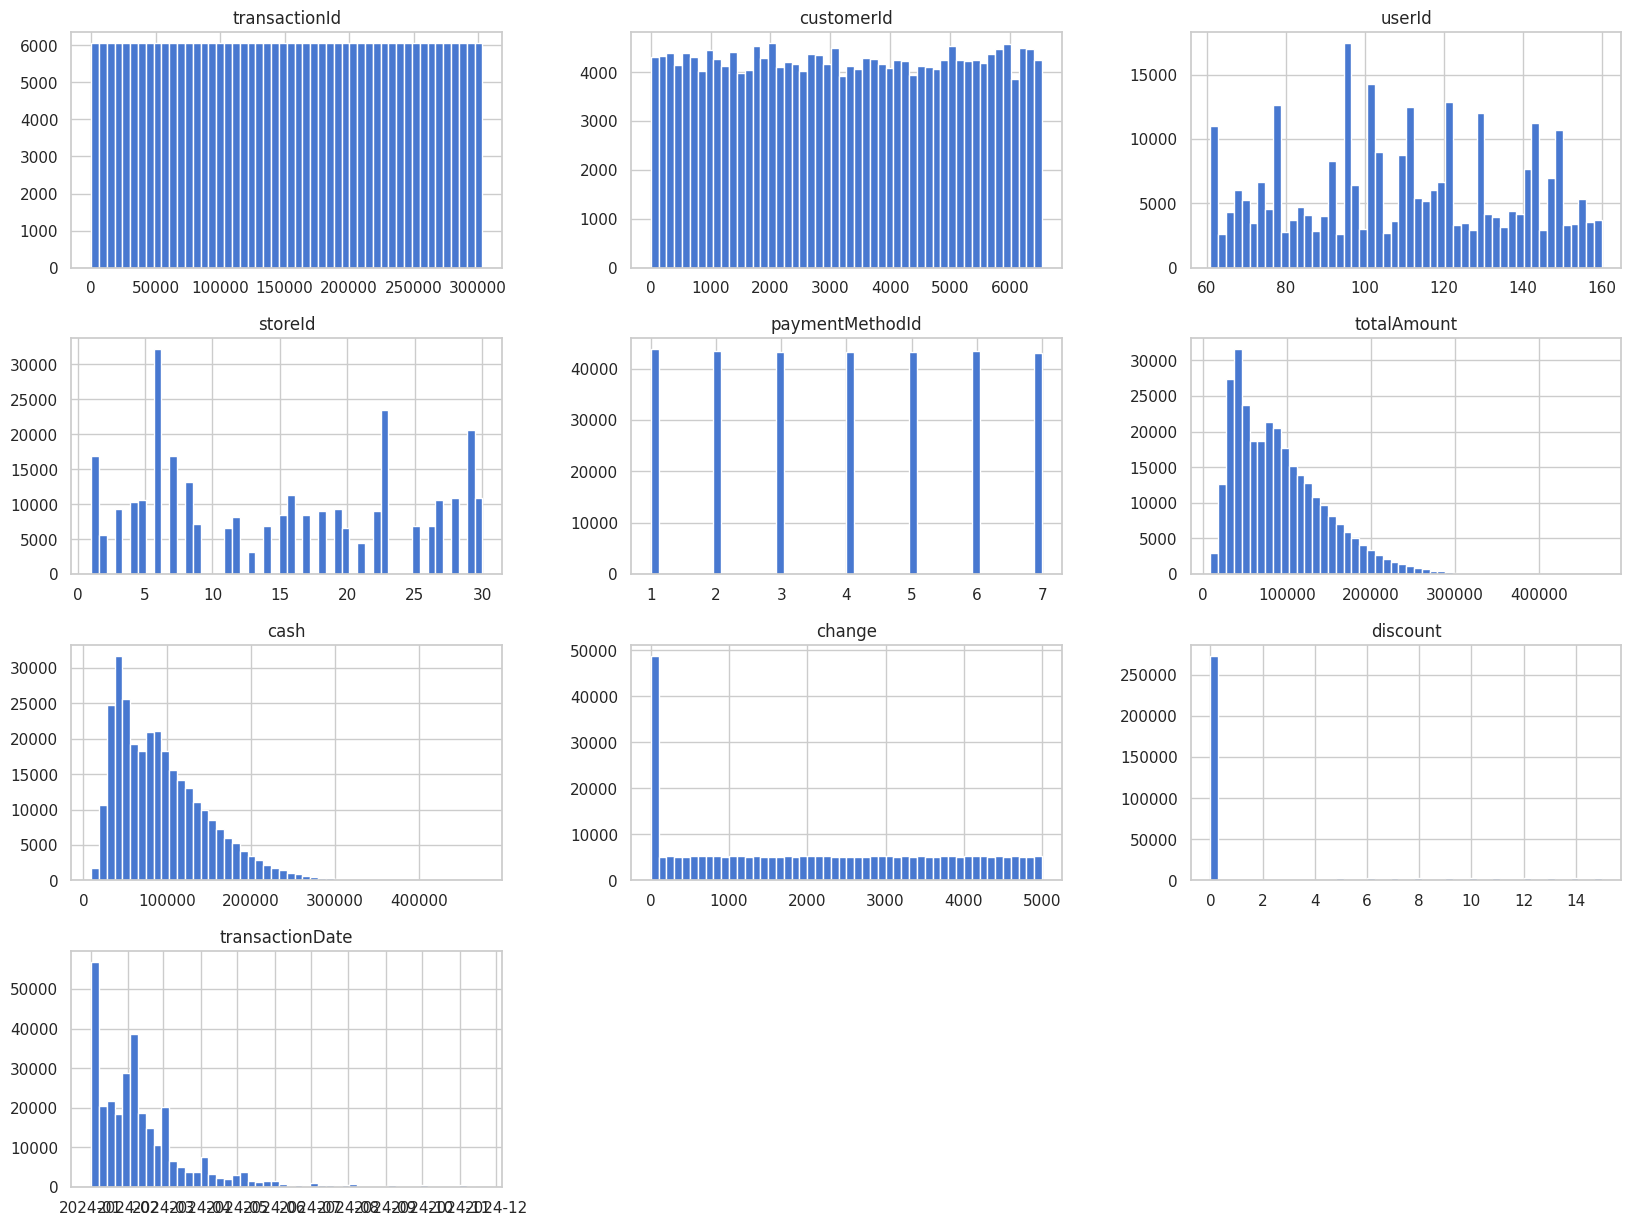

In [ ]:
transactions_df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
transaction_details_df

,transactionDetailId,transactionId,productId,variantId,quantity,subtotal
0,1,1,7,7,1,13713
1,2,1,3,3,3,101781
2,3,2,3,3,1,38069
3,4,3,1,1,1,41723
4,5,4,7,7,1,38227
...,...,...,...,...,...,...
485293,485294,303263,302,302,1,30624
485294,485295,303263,300,300,1,56940
485295,485296,303263,298,298,2,65632
485296,485297,303264,300,300,1,21216


In [ ]:
transactions_df['userId'].value_counts()

,count
userId,
95,11795
78,11605
111,10920
129,10793
122,10733
...,...
69,1077
64,1068
77,1056


In [ ]:
merge_df = pd.merge(transactions_df, transaction_details_df, on='transactionId', how='left')

In [ ]:
merge_df

,transactionId,invoiceId,customerId,userId,storeId,paymentMethodId,totalAmount,cash,change,discount,transactionDate,status,transactionDetailId,productId,variantId,quantity,subtotal
0,1,INV-181692133855,NaN,143,1,4,127043.4,131021.4,3978.0,0,2024-01-02 12:23:08,COMPLETED,1,7,7,1,13713
1,1,INV-181692133855,NaN,143,1,4,127043.4,131021.4,3978.0,0,2024-01-02 12:23:08,COMPLETED,2,3,3,3,101781
2,2,INV-259234020256,1676.0,86,1,7,41875.9,45636.9,3761.0,0,2024-01-02 11:24:57,COMPLETED,3,3,3,1,38069
3,3,INV-142873571905,NaN,140,1,5,45895.3,47477.3,1582.0,0,2024-01-04 15:37:52,COMPLETED,4,1,1,1,41723
4,4,INV-228061778424,5458.0,131,1,5,42049.7,42407.7,358.0,0,2024-01-01 09:17:05,COMPLETED,5,7,7,1,38227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485293,303263,INV-920592601951,6020.0,111,30,2,168515.6,168515.6,0.0,0,2024-11-13 09:18:56,COMPLETED,485294,302,302,1,30624
485294,303263,INV-920592601951,6020.0,111,30,2,168515.6,168515.6,0.0,0,2024-11-13 09:18:56,COMPLETED,485295,300,300,1,56940
485295,303263,INV-920592601951,6020.0,111,30,2,168515.6,168515.6,0.0,0,2024-11-13 09:18:56,COMPLETED,485296,298,298,2,65632
485296,303264,INV-408158761323,NaN,111,30,3,103689.3,107512.3,3823.0,0,2024-11-01 16:19:35,COMPLETED,485297,300,300,1,21216


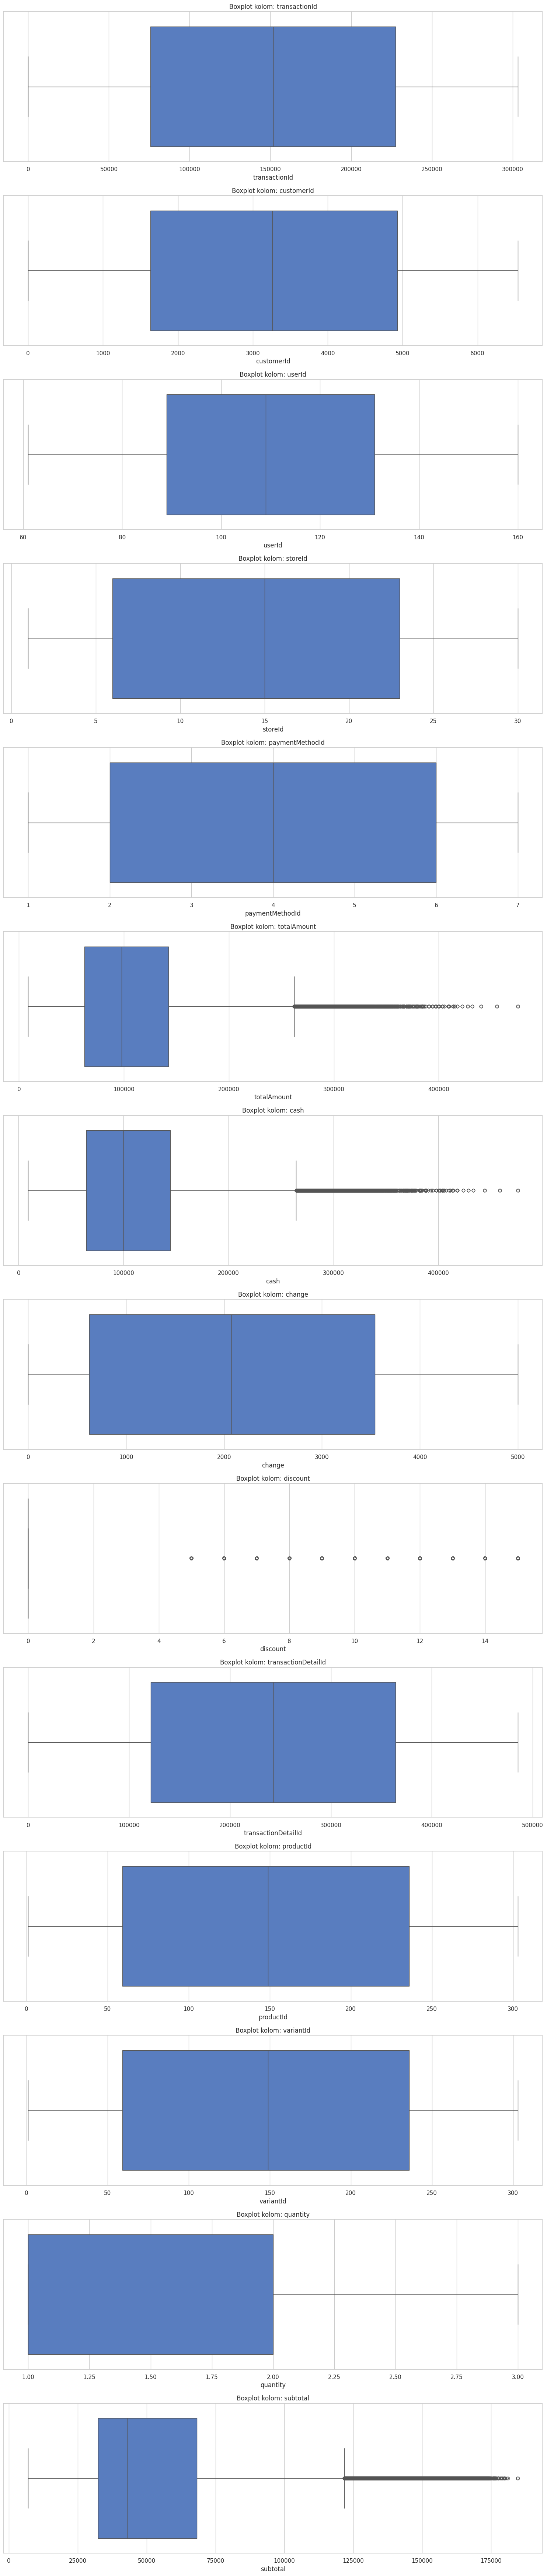

In [ ]:
numeric_columns = merge_df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 5 * len(numeric_columns)))

for index, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, index)
    sns.boxplot(x=merge_df[column])
    plt.title(f'Boxplot kolom: {column}')
    plt.tight_layout()

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Pastikan 'date' adalah datetime
merge_df = pd.merge(stores_df, merge_df, on='storeId',  how='left')
merge_df['transactionDate'] = pd.to_datetime(merge_df['transactionDate'])
merge_df['date'] = merge_df['transactionDate'].dt.date

merge_df = merge_df[merge_df['storeTypeId'] == 1]
merge_df
# Set plot style
sns.set(style="whitegrid", palette="muted")

# Plot penjualan semua toko
plt.figure(figsize=(14, 6))

for store_id in merge_df['storeId'].unique():
    store_data = merge_df[merge_df['storeId'] == store_id]
    plt.plot(store_data['date'], store_data['totalAmount'], label=f'Toko {store_id}')

plt.title('Penjualan Harian per Toko')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penjualan')
plt.legend()
plt.tight_layout()
plt.show()


,storeId,StoreCode_x,tenantId_x,name_x,image_x,address_x,provinceId_x,cityId_x,districtId_x,villageId_x,...,change,discount,transactionDate,status_y,transactionDetailId,productId,variantId,quantity,subtotal,date
0,1,STR-76001004,1,Makanan & Minuman Riyanti,https://dummyimage.com/79x70,"Jl. Kiaracondong No. 46\nSerang, ST 49506",32,71,5507,60708,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,2,STR-30909784,1,Perawatan Diri & Kecantikan Riyanti,https://placekitten.com/111/248,"Gang Ahmad Yani No. 34\nKupang, NT 77095",32,71,5783,61365,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,3,STR-82259321,1,"Elektronik, Gadget & Alat Musik Riyanti",https://placekitten.com/639/43,"Gang Dr. Djunjunan No. 8\nSerang, KU 00595",32,71,5693,60379,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,4,STR-36745611,2,Makanan & Minuman Purwanti,https://placekitten.com/502/281,"Gg. Monginsidi No. 750\nSemarang, SU 84214",32,71,5507,61482,...,2670.0,0.0,2024-01-05 16:13:33,COMPLETED,35933.0,37.0,37.0,3.0,80361.0,2024-01-05
4,4,STR-36745611,2,Makanan & Minuman Purwanti,https://placekitten.com/502/281,"Gg. Monginsidi No. 750\nSemarang, SU 84214",32,71,5507,61482,...,2670.0,0.0,2024-01-05 16:13:33,COMPLETED,35934.0,32.0,32.0,1.0,57718.0,2024-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84814,28,STR-44899143,9,Makanan & Minuman Mangunsong,https://picsum.photos/996/211,"Gg. Suryakencana No. 331\nMagelang, JK 67673",32,71,5753,60899,...,952.0,0.0,2024-07-04 19:50:01,COMPLETED,589957.0,307.0,307.0,1.0,37006.0,2024-07-04
84815,28,STR-44899143,9,Makanan & Minuman Mangunsong,https://picsum.photos/996/211,"Gg. Suryakencana No. 331\nMagelang, JK 67673",32,71,5753,60899,...,2345.0,0.0,2024-07-16 17:32:03,COMPLETED,589958.0,299.0,299.0,1.0,27061.0,2024-07-16
84816,28,STR-44899143,9,Makanan & Minuman Mangunsong,https://picsum.photos/996/211,"Gg. Suryakencana No. 331\nMagelang, JK 67673",32,71,5753,60899,...,2345.0,0.0,2024-07-16 17:32:03,COMPLETED,589959.0,307.0,307.0,1.0,43216.0,2024-07-16
84817,29,STR-25262084,9,Perawatan Diri & Kecantikan Mangunsong,https://picsum.photos/7/97,"Jl. Suryakencana No. 41\nPekalongan, MU 63171",32,71,5507,60714,...,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [ ]:
merge_df.columns

Index(['storeId', 'StoreCode_x', 'tenantId_x', 'name_x', 'image_x',
       'address_x', 'provinceId_x', 'cityId_x', 'districtId_x', 'villageId_x',
       'storeTypeId_x', 'postalCode_x', 'description_x', 'phoneNumber_x',
       'logo_x', 'npwpCompany_x', 'permitCertificate_x', 'status',
       'StoreCode_y', 'tenantId_y', 'name_y', 'image_y', 'address_y',
       'provinceId_y', 'cityId_y', 'districtId_y', 'villageId_y',
       'storeTypeId_y', 'postalCode_y', 'description_y', 'phoneNumber_y',
       'logo_y', 'npwpCompany_y', 'permitCertificate_y', 'status_x',
       'transactionId', 'invoiceId', 'customerId', 'userId', 'paymentMethodId',
       'totalAmount', 'cash', 'change', 'discount', 'transactionDate',
       'status_y', 'transactionDetailId', 'productId', 'variantId', 'quantity',
       'subtotal', 'date'],
      dtype='object')

### User Activity

In [ ]:
actions = [
    'Login', 'Logout', 'Tambah Produk', 'Edit Produk', 'Checkout',
    'cancel order', 'update profile', 'Transaksi'
]

In [ ]:
def generate_activity_users(store_users_df, num_records=100):
    activity_data = []

    for i in range(num_records):
        store_user = store_users_df.sample(n=1).iloc[0]
        user_id = store_user['userId']
        store_id = store_user['storeId']

        action = random.choice(actions)

        action_time = fake.date_time_between(start_date="-30d", end_date="now")

        activity_data.append({
            'userActivityId': i + 1,
            'userId': user_id,
            'storeId': store_id,
            'action': action,
            'actionTime': action_time
        })
    return activity_data

In [ ]:
activity_data = generate_activity_users(store_users_df, num_records=100)
activity_df = pd.DataFrame(activity_data)
activity_df.to_csv('user_activity.csv', index=False)

### Store Bill

In [ ]:
bills = [
    'listrik', 'air', 'pajak', 'es batu', 'hutang piutang', 'perawatan alat',
    'biaya sewa', 'ganti lampu', 'beli meja'
]

statuses = [
    'PAID', 'UNPAID'
]

def generate_store_bills(stores_data):
    store_bills_data = []
    store_bill_id = 1

    for store in stores_data:
        store_id = store['storeId']
        num_bills = random.randint(2, 5)

        for _ in range(num_bills):
            bill_name = random.choice(bills)
            status = random.choice(statuses)
            on_date = datetime.now() - timedelta(days=random.randint(0, 30))

            store_bills_data.append({
                'storeBillsId': store_bill_id,
                'storeId': store_id,
                'name': bill_name,
                'status': status,
                "onDate": on_date.strftime("%Y-%m-%d %H:%M:%S")
            })
            store_bill_id += 1
    return store_bills_data

In [ ]:
store_bills_data = generate_store_bills(stores_data)
store_bills_df = pd.DataFrame(store_bills_data)
store_bills_df.to_csv('store_bills.csv', index=False)

In [ ]:
store_bills_df

,storeBillsId,storeId,name,status,onDate
0,1,1,perawatan alat,UNPAID,2025-04-10 07:30:14
1,2,1,pajak,PAID,2025-04-07 07:30:14
2,3,1,ganti lampu,PAID,2025-04-14 07:30:14
3,4,2,air,UNPAID,2025-04-20 07:30:14
4,5,2,listrik,PAID,2025-04-08 07:30:14
...,...,...,...,...,...
93,94,30,hutang piutang,UNPAID,2025-04-14 07:30:14
94,95,30,ganti lampu,UNPAID,2025-04-04 07:30:14
95,96,30,biaya sewa,UNPAID,2025-04-04 07:30:14
96,97,30,perawatan alat,UNPAID,2025-04-22 07:30:14


### Supplier

In [ ]:
def generate_suppliers(tenants_df, num_supplier=50):
    suppliers_data = []
    supplier_id = 1

    if tenants_df is None or 'tenantId' not in tenants_df.columns:
        raise ValueError('Tenants_df harus disediakan dan memiliki kolom "tenantId"')

    tenant_ids = tenants_df['tenantId'].tolist()

    for _ in range(num_supplier):
        has_tenant = random.random() < 0.7
        suppliers_data.append({
            'supplierId': supplier_id,
            'name': fake.company(),
            'tenantId': str(random.choice(tenant_ids) if has_tenant else None),
            'phoneNumber': fake_phone_number(fake),
            'email': fake.email(),
            'address': fake.address(),
            'leadTimeDays': random.randint(3, 14)
        })
        supplier_id += 1
    return suppliers_data

In [ ]:
suppliers_data = generate_suppliers(tenants_df)
suppliers_df = pd.DataFrame(suppliers_data)
suppliers_df.to_csv('suppliers.csv', index=False)

In [ ]:
suppliers_df

,supplierId,name,tenantId,phoneNumber,email,address,leadTimeDays
0,1,PD Budiyanto Tbk,None,628770054640,naradi10@example.com,"Jl. R.E Martadinata No. 35\nParepare, BT 60216",14
1,2,Perum Napitupulu (Persero) Tbk,7,628182172307,sprabowo@example.net,"Jalan Wonoayu No. 80\nBitung, Sulawesi Tenggar...",3
2,3,PT Damanik Wacana Tbk,10,628212519027,usadashania@example.net,"Gang Gardujati No. 777\nPadang, PA 64693",11
3,4,PT Ramadan Suartini (Persero) Tbk,1,628123279247,uyainahkamal@example.org,"Jalan Sentot Alibasa No. 760\nJambi, JI 55320",9
4,5,PT Simbolon,None,628986466382,zsiregar@example.com,"Jl. Medokan Ayu No. 86\nJambi, Papua 31848",9
5,6,PD Sihombing Tbk,8,628982847096,lantarramadan@example.net,"Gang KH Amin Jasuta No. 21\nMalang, Maluku 39495",14
6,7,UD Padmasari Haryanto Tbk,8,628982267701,upradana@example.net,"Jalan W.R. Supratman No. 31\nKupang, KT 17952",6
7,8,PT Sihombing Wulandari Tbk,10,628149559676,rlailasari@example.com,"Jalan Kendalsari No. 2\nBanda Aceh, SB 22691",9
8,9,Perum Budiyanto Pangestu Tbk,None,628852092979,vhabibi@example.org,"Gang Kiaracondong No. 6\nBanjarbaru, JI 61727",14
9,10,PT Santoso Gunawan,9,628148721546,elisa93@example.org,"Gang Jend. Sudirman No. 6\nBanjar, BE 19039",12


### Supplier Products

In [ ]:
def generate_supplier_products(products_data, suppliers_data, num_entries=100):
    supplier_products_data = []
    supplier_product_id = 1

    # Validasi input
    if not products_data or not suppliers_data:
        raise ValueError("products_data dan suppliers_data harus disediakan dan tidak boleh kosong")

    # Set untuk memastikan kombinasi supplierId dan productId unik
    unique_combinations = set()

    # 1. Generate untuk semua supplier yang ada di suppliers_data
    for product in products_data:
        product_id = product['productId']

        # Pilih secara acak 1-3 supplier untuk setiap produk (atau kurang jika supplier terbatas)
        num_suppliers = random.randint(1, min(3, len(suppliers_data)))
        selected_suppliers = random.sample(suppliers_data, k=num_suppliers)

        for supplier in selected_suppliers:
            supplier_id = supplier['supplierId']
            combination = (supplier_id, product_id)

            if combination not in unique_combinations:
                supplier_products_data.append({
                    'supplierProductId': supplier_product_id,
                    'supplierId': supplier_id,
                    'productId': product_id
                })
                unique_combinations.add(combination)
                supplier_product_id += 1

    # 2. Tambahkan entri tambahan jika kurang dari num_entries
    while len(supplier_products_data) < num_entries and len(unique_combinations) < len(suppliers_data) * len(products_data):
        supplier = random.choice(suppliers_data)
        product = random.choice(products_data)
        supplier_id = supplier['supplierId']
        product_id = product['productId']
        combination = (supplier_id, product_id)

        if combination not in unique_combinations:
            supplier_products_data.append({
                'supplierProductId': supplier_product_id,
                'supplierId': supplier_id,
                'productId': product_id
            })
            unique_combinations.add(combination)
            supplier_product_id += 1

    print(f"Generated {len(supplier_products_data)} supplier-product relationships")
    return supplier_products_data

In [ ]:
supplier_products_data = generate_supplier_products(products_data, suppliers_data, num_entries=50)
supplier_products_df = pd.DataFrame(supplier_products_data)
supplier_products_df.to_csv('supplier_product.csv', index=False)

Generated 606 supplier-product relationships


In [ ]:
supplier_products_df

,supplierProductId,supplierId,productId
0,1,18,1
1,2,32,1
2,3,1,1
3,4,2,2
4,5,31,3
...,...,...,...
601,602,14,301
602,603,20,301
603,604,18,301
604,605,22,302


### Purchase Orders, Purchase Order Items, Warehouse

In [ ]:
food_and_beverage_categories = set(product_category_fnb_stores.values()) | \
                              set(product_category_minimarket_stores.values()) | \
                              set(product_category_baby_child_stores.values()) & {"Susu Formula", "Makanan Bayi"} | \
                              set(product_category_pharmacy_stores.values()) & {"Minuman Kesehatan"}

In [ ]:
def generate_purchase_orders(suppliers_df, stores_df, products_df, transactions_df, transaction_details_df, start_date, end_date):
    purchase_orders_data = []
    purchase_order_items_data = []
    warehouse_stocks_data = []
    purchase_order_id = 1
    purchase_order_item_id = 1
    warehouse_stock_id = 1

    # Inisialisasi stok awal
    stock_levels = {
        store_id: {product_id: random.randint(50, 200) for product_id in products_df[products_df['storeId'] == store_id]['productId']}
        for store_id in stores_df['storeId']
    }

    # Gabungkan transaksi dan detail transaksi
    merged_transactions_df = transaction_details_df.merge(
        transactions_df[['transactionId', 'storeId', 'transactionDate']],
        on='transactionId',
        how='left'
    )

    # Frekuensi PO (2-3 minggu)
    po_frequency = timedelta(days=random.randint(14, 21))
    current_date = start_date

    # Definisikan kategori makanan berdasarkan category_mapping (contoh)
    food_category_ids = [1, 2]  # Ganti dengan ID kategori makanan yang sesuai dari category_mapping Anda

    while current_date < end_date:
        period_start = max(current_date - po_frequency, start_date)
        period_end = current_date
        period_transactions = merged_transactions_df[
            (merged_transactions_df['transactionDate'] >= period_start) &
            (merged_transactions_df['transactionDate'] < period_end)
        ]

        if period_transactions.empty:
            print(f"Tidak ada transaksi untuk periode {period_start} - {period_end}")
            current_date += po_frequency
            continue

        transaction_summary = period_transactions.groupby(['storeId', 'productId']).agg({
            'quantity': 'sum'
        }).reset_index()

        for _, store in stores_df.iterrows():
            store_id = store['storeId']
            store_type_id = store['storeTypeId']
            store_transactions = transaction_summary[transaction_summary['storeId'] == store_id]

            if store_transactions.empty:
                continue

            min_stock = 50 if store_type_id in [10, 11] else 20
            reorder_point = min_stock * 1.5
            items_to_order = []

            for _, trans in store_transactions.iterrows():
                product_id = trans['productId']
                total_sold = int(trans['quantity'])
                current_stock = stock_levels[store_id].get(product_id, 0) - total_sold
                stock_levels[store_id][product_id] = max(0, current_stock)

                if current_stock < reorder_point:
                    demand_factor = random.uniform(1.2, 2.0)
                    quantity_to_order = int(total_sold * demand_factor)
                    items_to_order.append((product_id, quantity_to_order))

            if not items_to_order:
                continue

            supplier = suppliers_df.sample(n=1).iloc[0]
            supplier_id = supplier['supplierId']
            lead_time = int(supplier['leadTimeDays'])
            order_date = current_date + timedelta(days=random.randint(0, 3))
            delivery_date = order_date + timedelta(days=lead_time)
            total_amount = 0

            purchase_orders_data.append({
                'purchaseOrderId': purchase_order_id,
                'supplierId': supplier_id,
                'storeId': store_id,
                'totalAmount': 0,  # Akan diperbarui nanti
                'orderDate': order_date,
                'deliveryDate': delivery_date,
                'status': 'DELIVERED'
            })

            for product_id, quantity in items_to_order:
                product = products_df[products_df['productId'] == product_id].iloc[0]
                # Bulatkan capital_price ke 2 digit desimal
                capital_price = round(product['basePrice'] * random.uniform(0.7, 0.9), 2)
                total_amount += quantity * capital_price

                # Periksa apakah produk termasuk kategori makanan
                is_food = 'categoryId' in product and product['categoryId'] in food_category_ids
                expired_date = delivery_date + timedelta(days=random.randint(90, 365)) if is_food else None

                purchase_order_items_data.append({
                    'purchaseOrderItemId': purchase_order_item_id,
                    'purchaseOrderId': purchase_order_id,
                    'productId': product_id,
                    'quantity': quantity,
                    'capitalPrice': capital_price,  # Sudah dibulatkan
                    'expiredDate': expired_date
                })

                stock_levels[store_id][product_id] = stock_levels[store_id].get(product_id, 0) + quantity
                stock_remaining = min(stock_levels[store_id][product_id], random.randint(50, 200))

                warehouse_stocks_data.append({
                    'warehouseStockId': warehouse_stock_id,
                    'productId': product_id,
                    'storeId': store_id,
                    'purchaseOrderId': purchase_order_id,
                    'stock': stock_remaining,
                    'supplierId': supplier_id
                })

                purchase_order_item_id += 1
                warehouse_stock_id += 1

            # Bulatkan total_amount ke 2 digit desimal
            purchase_orders_data[-1]['totalAmount'] = round(total_amount, 2)
            print(f"PO {purchase_order_id} untuk storeId {store_id}: {len(items_to_order)} item, Total: {purchase_orders_data[-1]['totalAmount']}")
            purchase_order_id += 1

        current_date += po_frequency

    return purchase_orders_data, purchase_order_items_data, warehouse_stocks_data

In [ ]:
start_date = datetime(2024, 1, 1)
end_date = datetime(2025, 3, 19)

purchase_orders_data, purchase_order_items_data, warehouse_stocks_data = generate_purchase_orders(
    suppliers_df, stores_df, products_df, transactions_df, transaction_details_df, start_date, end_date
)

# Konversi ke DataFrame dan simpan ke CSV
purchase_orders_df = pd.DataFrame(purchase_orders_data)
purchase_order_items_df = pd.DataFrame(purchase_order_items_data)
warehouse_stocks_df = pd.DataFrame(warehouse_stocks_data)

purchase_orders_df.to_csv('purchase_orders.csv', index=False)
purchase_order_items_df.to_csv('purchase_order_items.csv', index=False)
warehouse_stocks_df.to_csv('warehouse_stocks.csv', index=False)

Tidak ada transaksi untuk periode 2024-01-01 00:00:00 - 2024-01-01 00:00:00
PO 1 untuk storeId 1: 9 item, Total: 2495972656.53
PO 2 untuk storeId 2: 13 item, Total: 33461961961.45
PO 3 untuk storeId 3: 6 item, Total: 7741914439.86
PO 4 untuk storeId 4: 12 item, Total: 977229795.7
PO 5 untuk storeId 5: 8 item, Total: 7404987717.5
PO 6 untuk storeId 6: 14 item, Total: 1075248850.81
PO 7 untuk storeId 7: 8 item, Total: 304639440.82
PO 8 untuk storeId 8: 10 item, Total: 2705906125.61
PO 9 untuk storeId 9: 10 item, Total: 1481540774.12
PO 10 untuk storeId 11: 6 item, Total: 4637918639.56
PO 11 untuk storeId 12: 9 item, Total: 4633053388.43
PO 12 untuk storeId 13: 8 item, Total: 346384317.17
PO 13 untuk storeId 14: 15 item, Total: 621539855.1
PO 14 untuk storeId 15: 10 item, Total: 31262257002.92
PO 15 untuk storeId 16: 9 item, Total: 1529242731.72
PO 16 untuk storeId 17: 15 item, Total: 7069815525.14
PO 17 untuk storeId 18: 9 item, Total: 4406792488.83
PO 18 untuk storeId 19: 11 item, Total

In [ ]:
purchase_orders_df

,purchaseOrderId,supplierId,storeId,totalAmount,orderDate,deliveryDate,status
0,1,46,1,2.495973e+09,2024-01-18,2024-02-01,DELIVERED
1,2,8,2,3.346196e+10,2024-01-18,2024-01-27,DELIVERED
2,3,30,3,7.741914e+09,2024-01-16,2024-01-22,DELIVERED
3,4,46,4,9.772298e+08,2024-01-16,2024-01-30,DELIVERED
4,5,16,5,7.404988e+09,2024-01-18,2024-01-31,DELIVERED
...,...,...,...,...,...,...,...
126,127,15,30,2.668886e+07,2024-09-30,2024-10-11,DELIVERED
127,128,50,30,3.737589e+08,2024-10-15,2024-10-27,DELIVERED
128,129,9,30,1.263512e+08,2024-10-29,2024-11-12,DELIVERED
129,130,46,30,2.640835e+08,2024-11-13,2024-11-27,DELIVERED


In [ ]:
purchase_order_items_df

,purchaseOrderItemId,purchaseOrderId,productId,quantity,capitalPrice,expiredDate
0,1,1,1,2840,339978.71,NaT
1,2,1,2,1944,147539.38,NaT
2,3,1,3,2738,69082.52,NaT
3,4,1,4,2926,32182.48,NaT
4,5,1,5,2332,99040.49,NaT
...,...,...,...,...,...,...
746,747,130,302,459,575345.23,NaT
747,748,131,298,62,20557.38,NaT
748,749,131,300,75,295024.93,NaT
749,750,131,301,85,357853.80,NaT


In [ ]:
purchase_order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   purchaseOrderItemId  751 non-null    int64         
 1   purchaseOrderId      751 non-null    int64         
 2   productId            751 non-null    int64         
 3   quantity             751 non-null    int64         
 4   capitalPrice         751 non-null    float64       
 5   expiredDate          6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 35.3 KB


In [ ]:
purchase_order_items_df['expiredDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 751 entries, 0 to 750
Series name: expiredDate
Non-Null Count  Dtype         
--------------  -----         
6 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.0 KB


In [ ]:
warehouse_stocks_df

,warehouseStockId,productId,storeId,purchaseOrderId,stock,supplierId
0,1,1,1,1,146,46
1,2,2,1,1,153,46
2,3,3,1,1,93,46
3,4,4,1,1,82,46
4,5,5,1,1,100,46
...,...,...,...,...,...,...
746,747,302,30,130,146,46
747,748,298,30,131,82,48
748,749,300,30,131,84,48
749,750,301,30,131,104,48


In [ ]:
products_df.pop('storeId')
products_df.to_csv('products.csv', index=False)

In [ ]:
products_df

,productId,productCode,serialNumber,categoryId,name,description,discount,basePrice,imageUrl,isActive,createdAt,updatedAt
0,1,PRD-743764,726597.0,82,Token Listrik PLN Nam,Minima laboriosam excepturi sint recusandae nu...,20,404000,https://placekitten.com/723/1008,True,2025-01-19T18:52:48.198038,2025-02-06T21:23:10.927051
1,2,PRD-839234,NaN,84,Pembayaran Tagihan Nulla,Laborum unde natus at impedit architecto ullam...,0,172000,https://picsum.photos/466/508,True,2025-03-20T12:15:12.356444,2025-02-12T21:03:26.490182
2,3,PRD-561450,NaN,81,Pulsa & Paket Data Exercitationem,Et unde ducimus laudantium iure praesentium de...,0,95000,https://dummyimage.com/832x455,True,2025-02-20T16:08:16.884128,2025-02-12T06:35:24.920538
3,4,PRD-483992,NaN,81,Pulsa & Paket Data Eos,Excepturi atque cumque eius neque necessitatib...,12,36000,https://dummyimage.com/455x816,True,2025-01-13T10:22:01.921913,2025-03-01T06:49:27.759361
4,5,PRD-464337,NaN,81,Pulsa & Paket Data Laudantium,Explicabo occaecati accusamus ad nesciunt magn...,0,119000,https://placekitten.com/475/958,True,2025-03-27T22:54:45.455084,2025-01-27T05:08:46.761337
...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,PRD-952891,NaN,99,Pupuk dan Obat Tanaman Inventore,Placeat iusto nihil nostrum magni quos sequi c...,0,110000,https://dummyimage.com/893x820,True,2025-03-28T22:11:47.703132,2025-03-21T07:21:42.488171
299,300,PRD-610785,849140.0,102,Kandang dan Aksesoris Hewan Animi,Voluptates velit ut explicabo illo perferendis...,0,344000,https://dummyimage.com/400x191,True,2025-03-09T22:48:08.086929,2025-01-20T06:29:57.103363
300,301,PRD-897108,NaN,102,Kandang dan Aksesoris Hewan Cumque,Eius exercitationem asperiores officia tempora...,0,458000,https://dummyimage.com/710x769,True,2025-02-16T02:16:13.166854,2025-01-23T03:11:03.265347
301,302,PRD-202776,NaN,102,Kandang dan Aksesoris Hewan Reprehenderit,Veniam incidunt ipsum voluptatum molestias lau...,0,650000,https://placekitten.com/71/388,True,2025-03-22T07:33:28.630501,2025-04-20T16:16:40.431609


In [ ]:
!rm -rf sample_data/

In [ ]:
!zip -r /content/all_files.zip /content/*

  adding: content/categories.csv (deflated 44%)
  adding: content/customers.csv (deflated 66%)
  adding: content/payment_methods.csv (deflated 44%)
  adding: content/products.csv (deflated 66%)
  adding: content/purchase_order_items.csv (deflated 53%)
  adding: content/purchase_orders.csv (deflated 69%)
  adding: content/shifts.csv (deflated 86%)
  adding: content/store_bills.csv (deflated 80%)
  adding: content/stores.csv (deflated 63%)
  adding: content/store_users.csv (deflated 52%)
  adding: content/supplier_product.csv (deflated 60%)
  adding: content/suppliers.csv (deflated 55%)
  adding: content/tenants.csv (deflated 47%)
  adding: content/transaction_details.csv (deflated 68%)
  adding: content/transactions.csv (deflated 67%)
  adding: content/user_activity.csv (deflated 62%)
  adding: content/users.csv (deflated 49%)
  adding: content/variant_options.csv (deflated 53%)
  adding: content/variant_option_variants.csv (deflated 60%)
  adding: content/variants.csv (deflated 72%)
  